In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from utils import (
    get_runs, plot_for_each_level,
    feedback_order, feedback_mapping
)

In [2]:
runs = get_runs()

In [ ]:
runs['completion_status'] = runs['is_completed'].map({0: 'Not Completed', 1: 'Completed'})
runs['difficulty_rounded'] = runs['difficulty'].round(2)

folder_path = './figs/gameplay_analysis/'

# Pergunta: "Como a dificuldade das salas influencia o desempenho do jogador?"

## Média de mortes x dificuldade

Pergunta: "Os jogadores morrem mais em níveis mais difíceis?

In [ ]:
data = []

for level in runs['level'].unique():
    df_level = runs[runs['level'] == level]
    deaths = df_level[df_level['is_completed'] == 0]

    for difficulty in df_level['difficulty'].unique():
        num_deaths = deaths[deaths['difficulty'] == difficulty].shape[0]
        total_attempts = df_level[df_level['difficulty'] == difficulty].shape[0]

        if total_attempts > 0:
            mean_deaths = num_deaths / total_attempts
            data.append({'level': level, 'difficulty': difficulty, 'mean_deaths': mean_deaths})

df_death = pd.DataFrame(data)

### Barplot

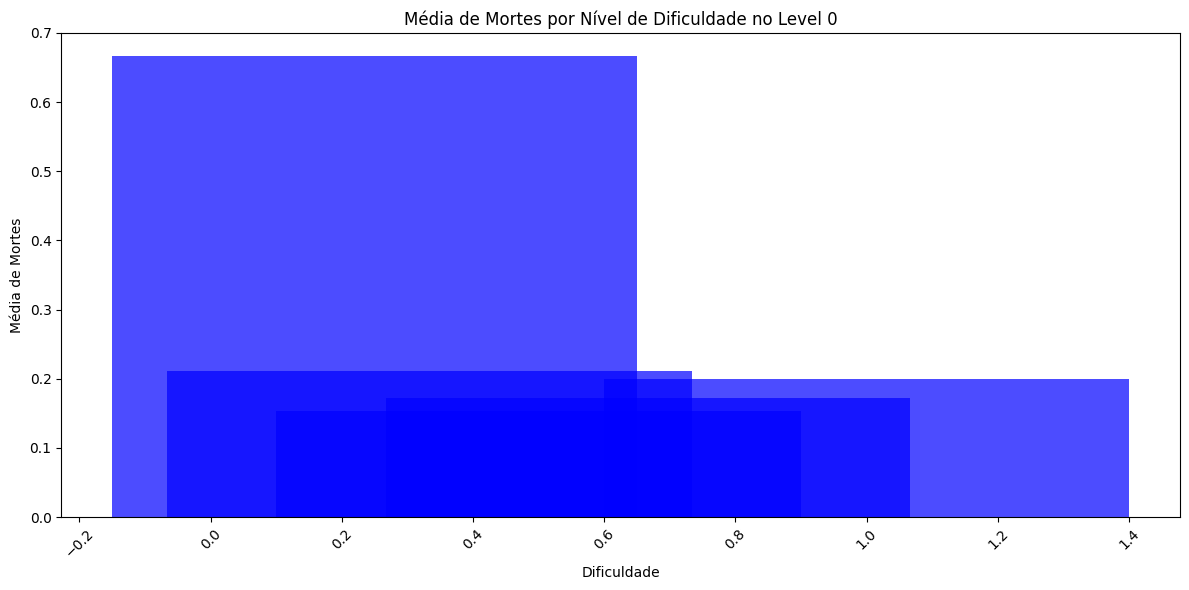

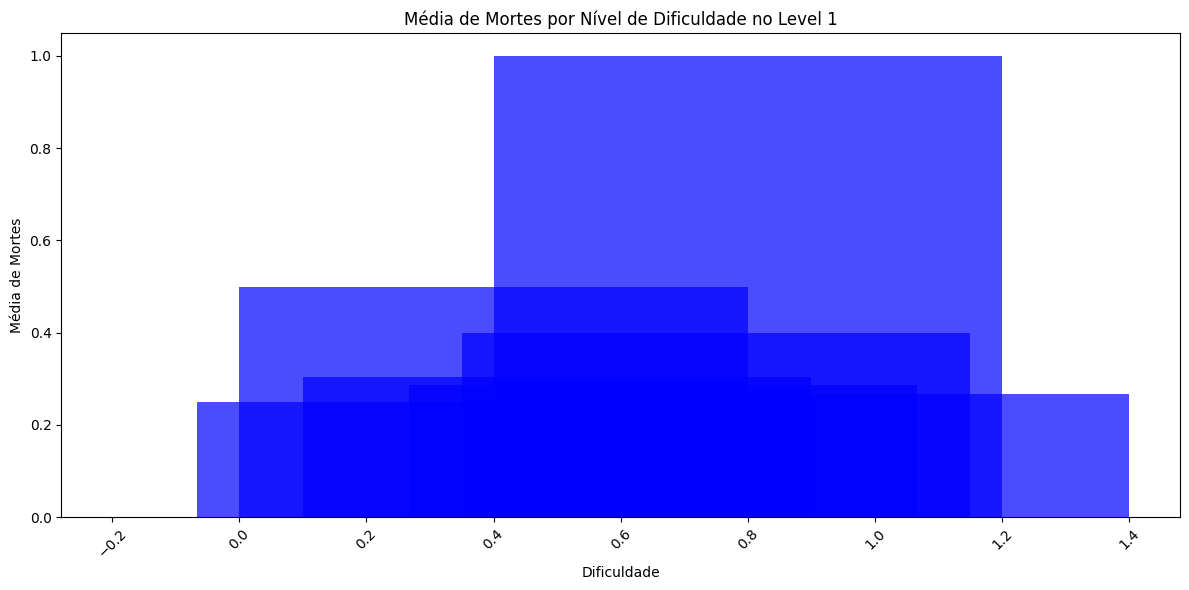

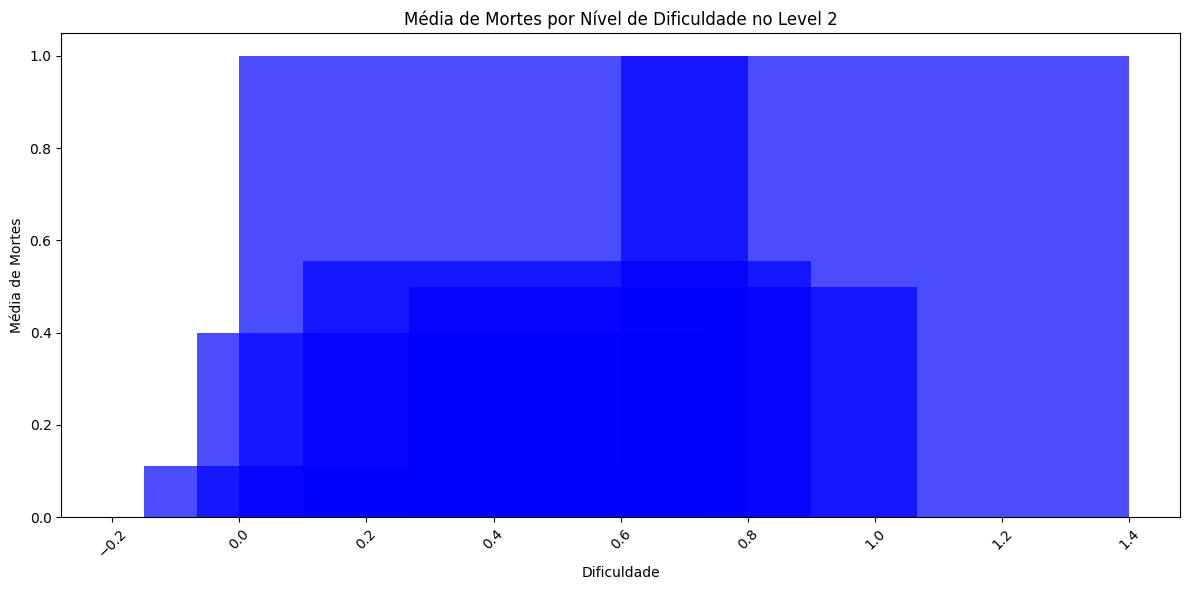

In [5]:
def plot_death_mean_barplot(df, level):
    plt.figure(figsize=(12, 6))
    plt.bar(df['difficulty'], df['mean_deaths'], color='blue', alpha=0.7)
    plt.xlabel('Dificuldade')
    plt.ylabel('Média de Mortes')
    plt.title(f'Média de Mortes por Nível de Dificuldade no Level {level}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{folder_path}/death_mean_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(df_death, plot_death_mean_barplot)

### Density plot

#### Plot para cada nível

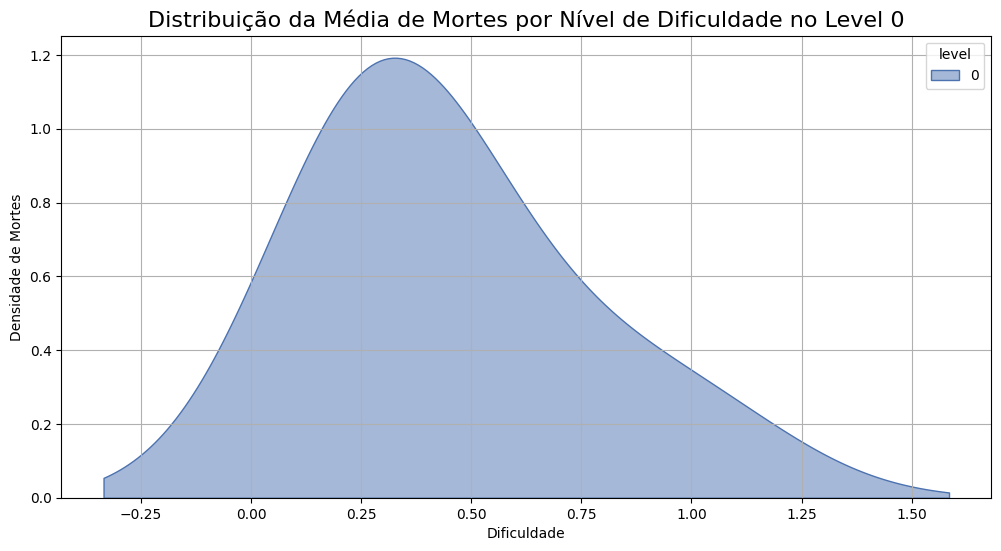

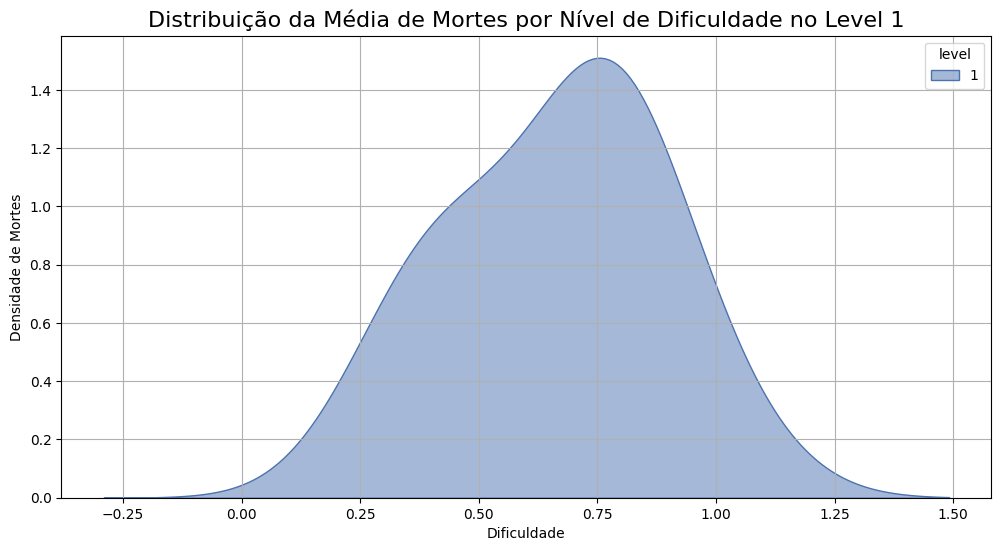

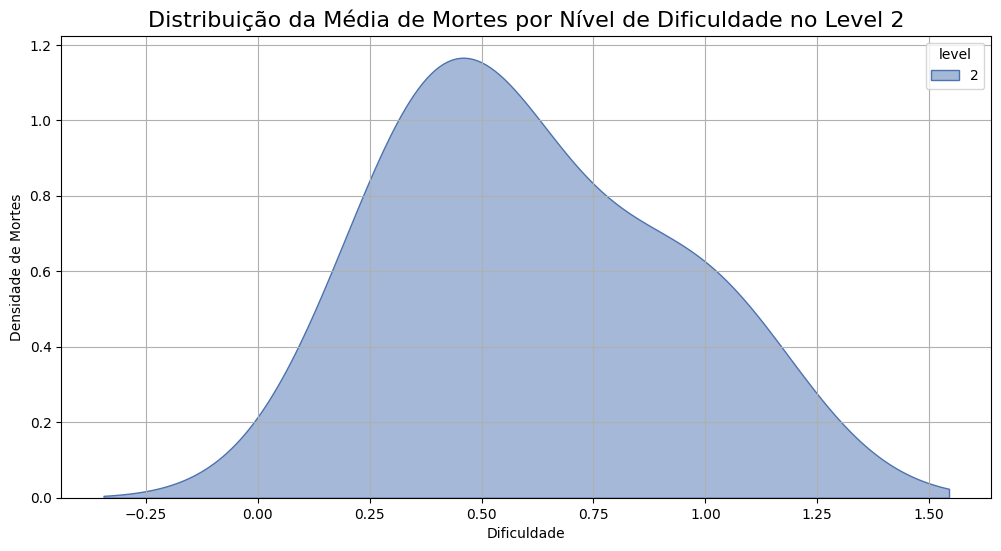

In [ ]:
def plot_death_mean_density(df, level=None):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df,
            x='difficulty', 
            weights='mean_deaths',
            hue='level',
            fill=True,
            alpha=0.5,
            palette='deep',
            common_norm=False)

    plt.xlabel('Dificuldade')
    plt.ylabel('Densidade de Mortes')
    plt.grid()

    if level is not None:
        plt.title(f'Distribuição da Média de Mortes por Nível de Dificuldade no Level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/death_mean_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Distribuição da Média de Mortes por Nível de Dificuldade', fontsize=16)
        plt.savefig(f'{folder_path}/death_mean_difficulty.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(df_death, plot_death_mean_density)

#### Em um plot só

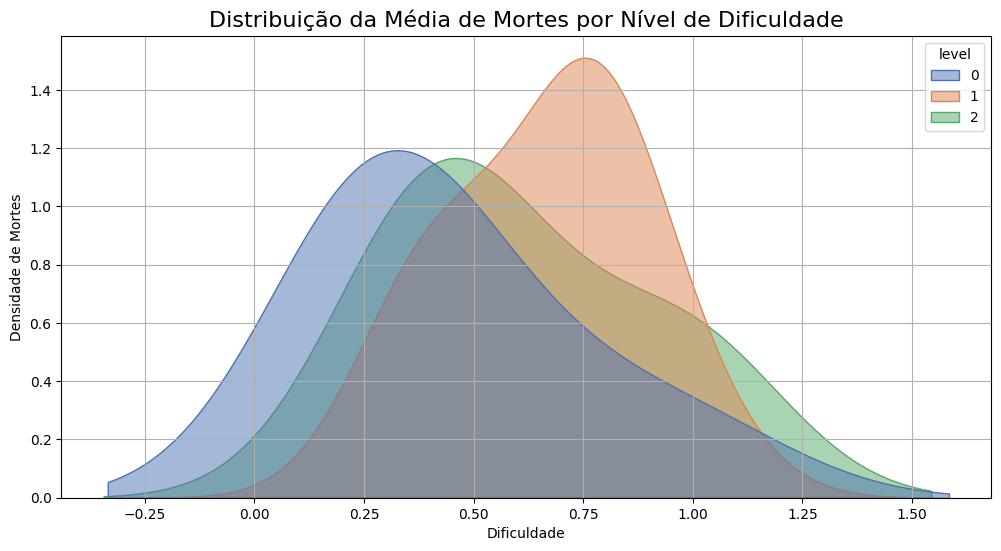

In [7]:
plot_death_mean_density(df_death)

## Vida perdida x dificuldade

Pergunta: "Os jogadores perdem mais vidas em níveis mais difíceis?"

### Boxplot

#### Um plot para cada nível

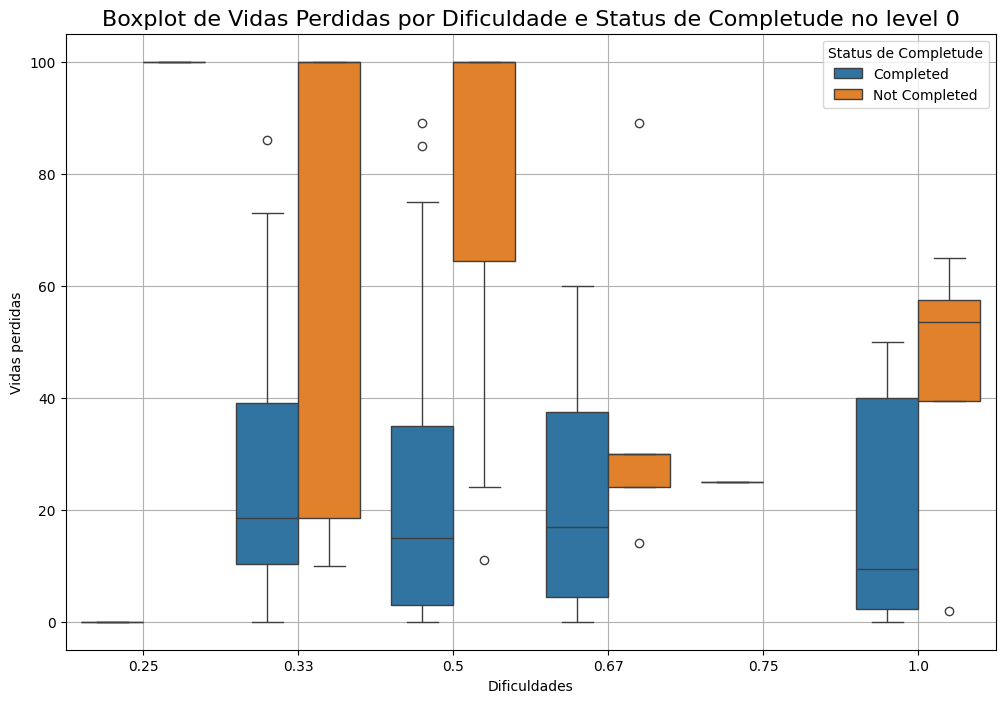

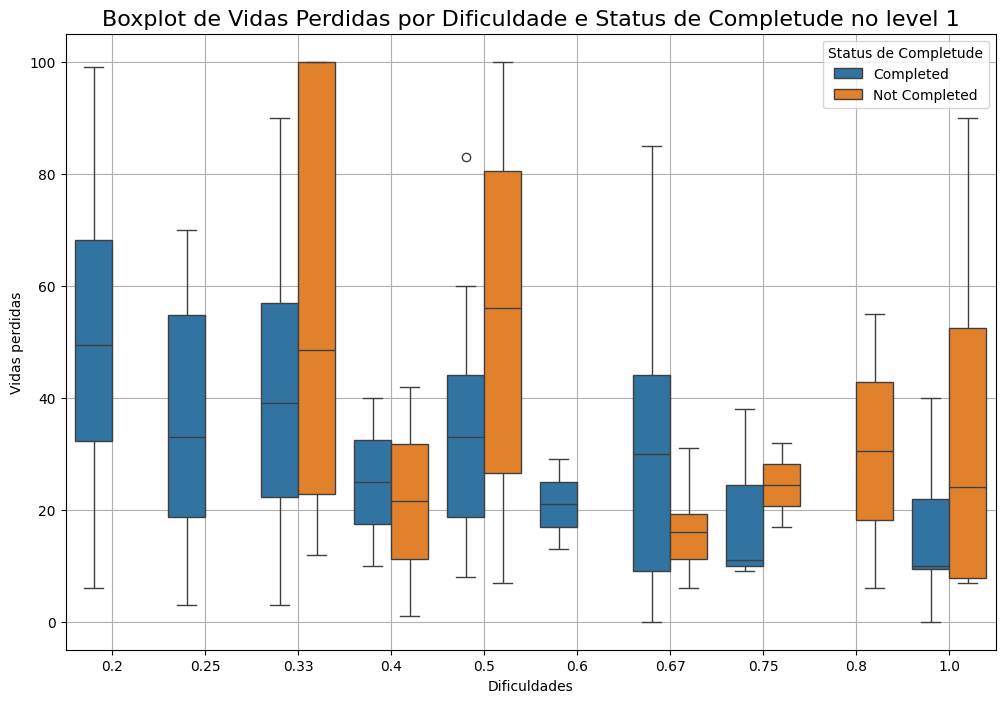

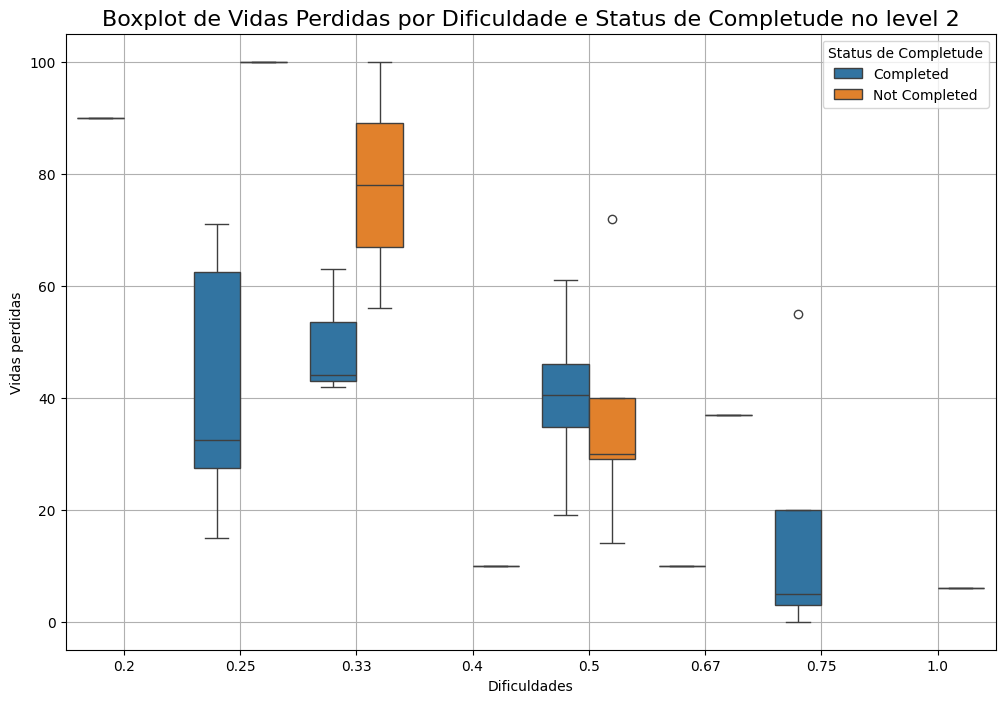

In [ ]:
def plot_lost_life_boxplot(df, level=None):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='difficulty_rounded', y='lostLife', hue='completion_status', data=df, dodge=True)
    plt.xlabel('Dificuldades')
    plt.ylabel('Vidas perdidas')
    plt.legend(title='Status de Completude')
    plt.grid()

    if level is not None:
        plt.title(f'Boxplot de Vidas Perdidas por Dificuldade e Status de Completude no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/life_lost_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Vidas Perdidas por Dificuldade e Status de Completude', fontsize=16)
        plt.savefig(f'{folder_path}/life_lost_difficulty.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs, plot_lost_life_boxplot)

#### Todos os níveis de uma vez só

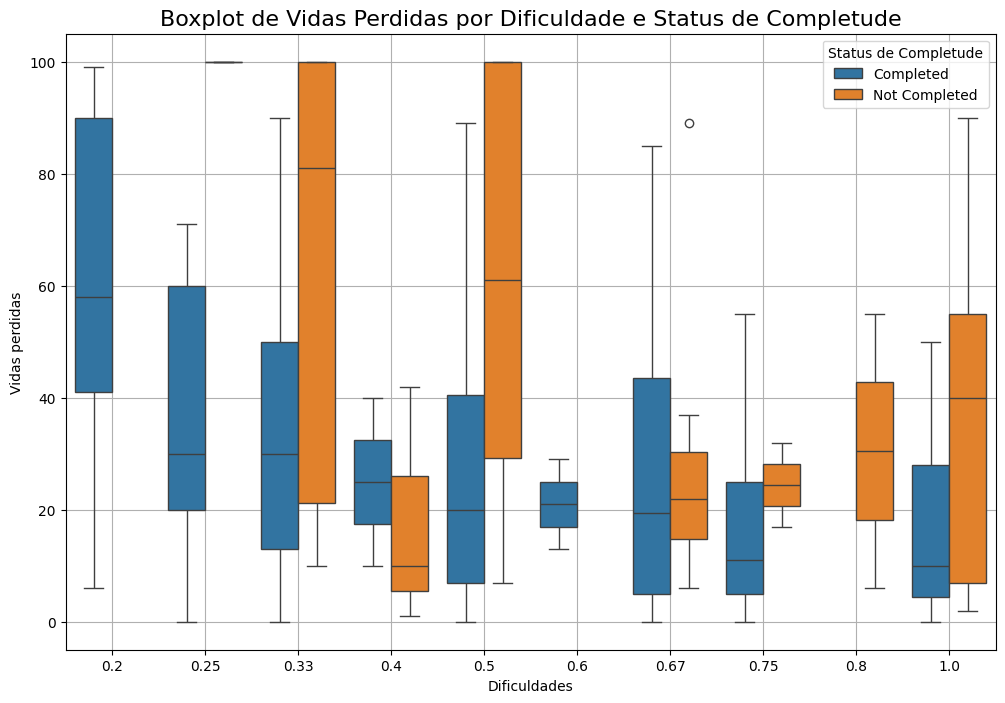

In [9]:
plot_lost_life_boxplot(runs)

## Tempo x dificuldade

Pergunta: "Jogadores tendem a passar mais tempo em níveis difíceis?"

### Boxplot

#### Um plot para cada nível

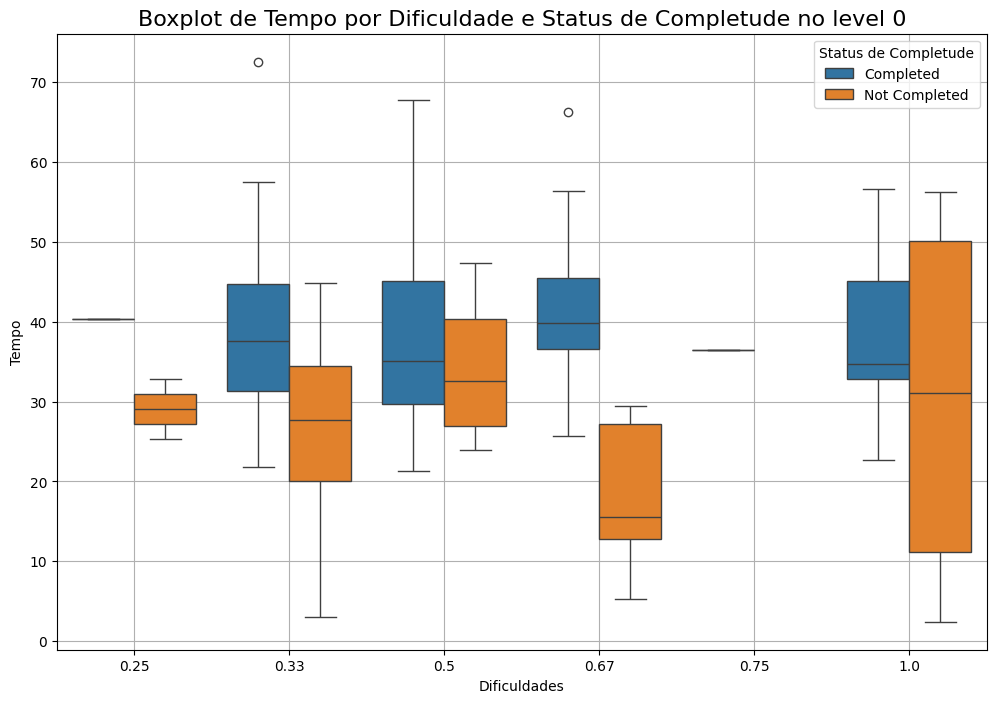

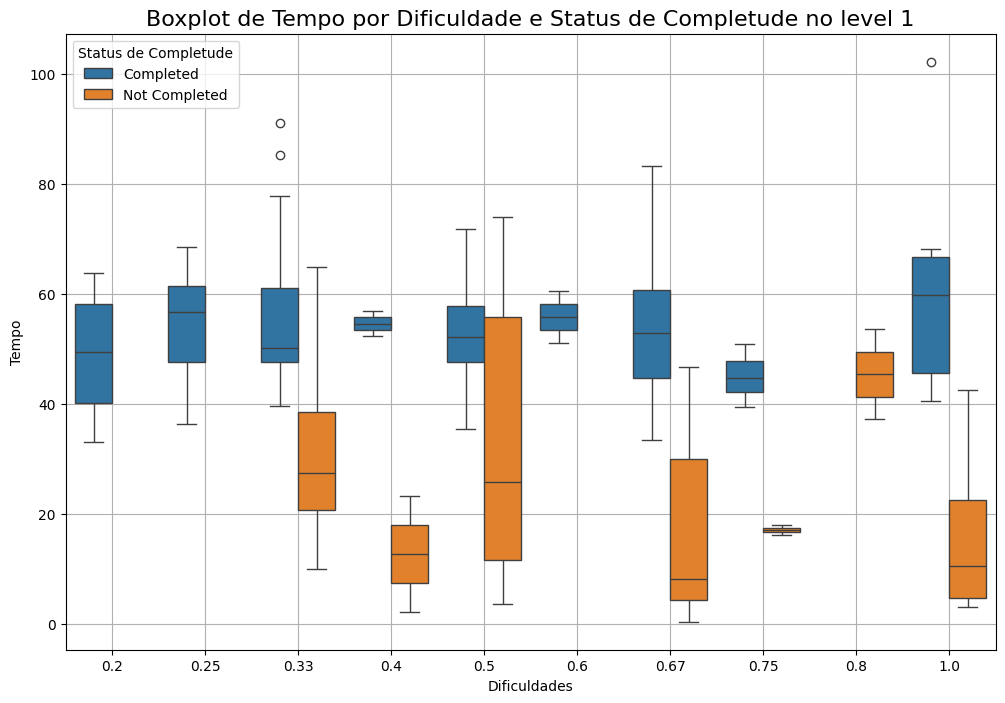

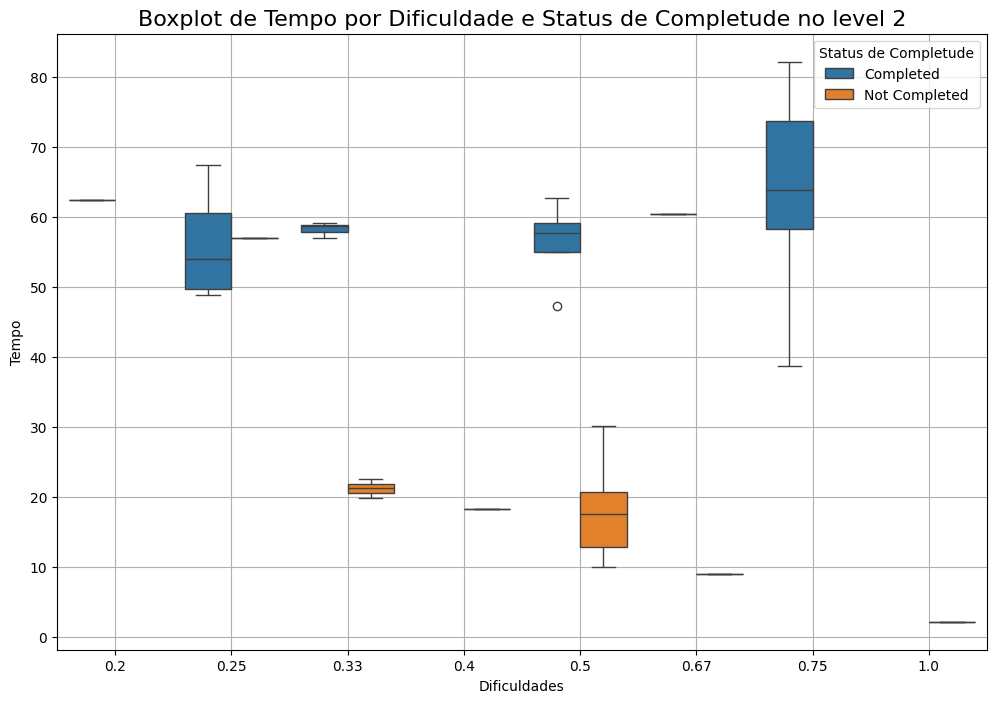

In [ ]:
def plot_time_boxplot(df, level=None):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='difficulty_rounded', y='time', hue='completion_status', data=df, dodge=True)
    plt.xlabel('Dificuldades')
    plt.ylabel('Tempo')
    plt.legend(title='Status de Completude')
    plt.grid()

    if level is not None:
        plt.title(f'Boxplot de Tempo por Dificuldade e Status de Completude no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/time_difficulty_completed_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Tempo por Dificuldade e Status de Completude no level', fontsize=16)
        plt.savefig(f'{folder_path}/time_difficulty_completed.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs, plot_time_boxplot)

#### Todos níveis em um plot só

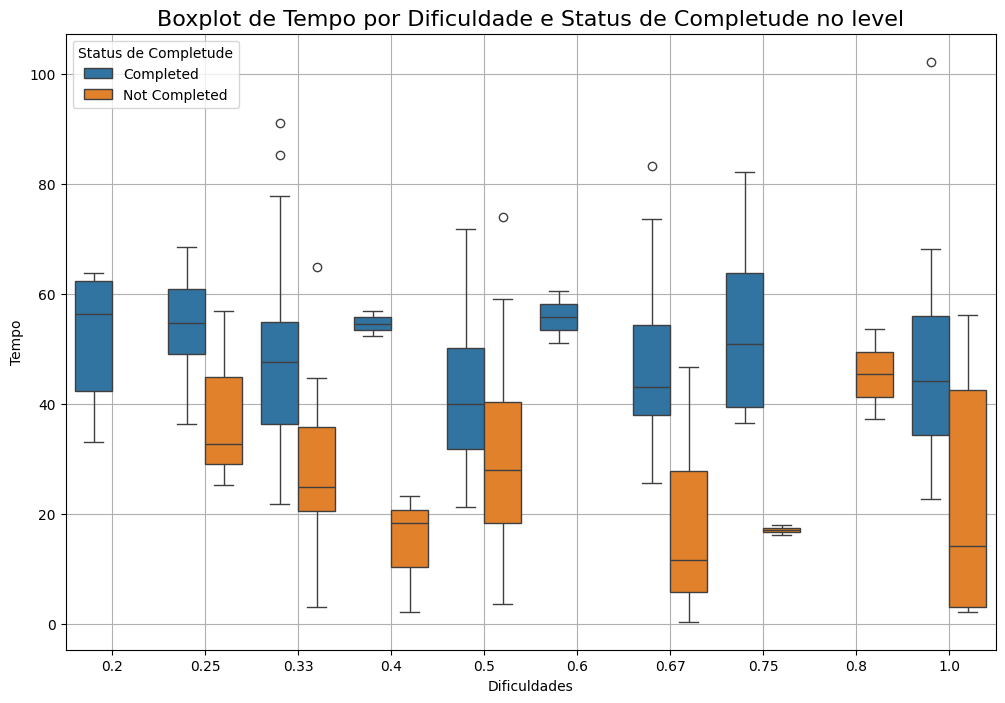

In [11]:
plot_time_boxplot(runs)

# Pergunta: "Qual a relação entre o feedback do jogador e seu desempenho?"

## Vida perdida x feedback

Pergunta: "Os jogadores perdem mais vidas em níveis que acharam mais difíceis?"

### Boxplot

#### Plot por level

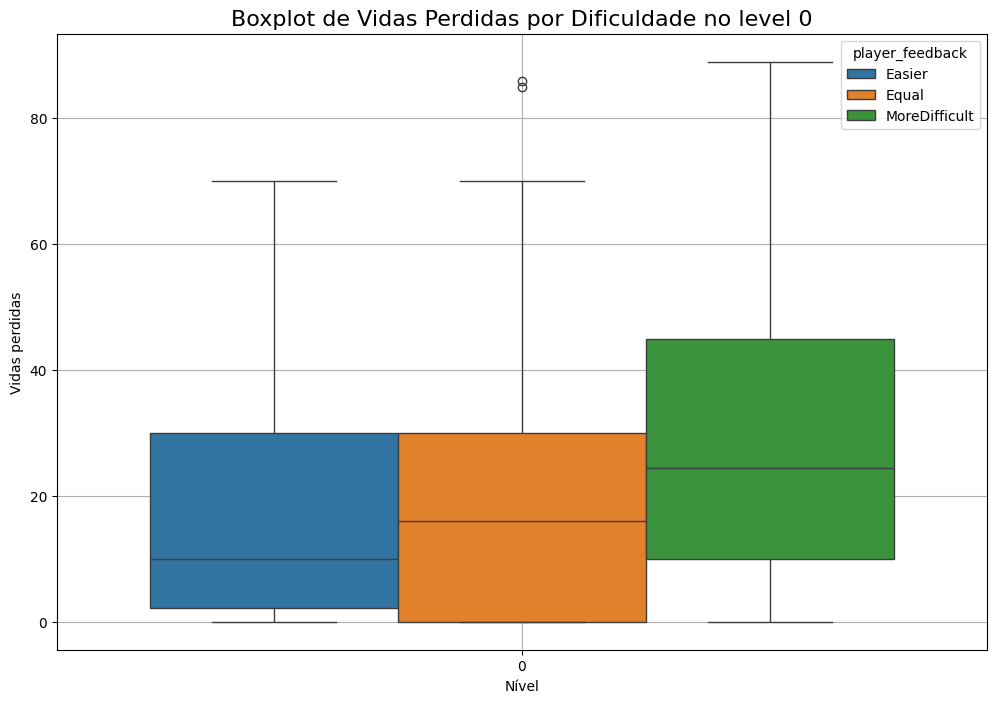

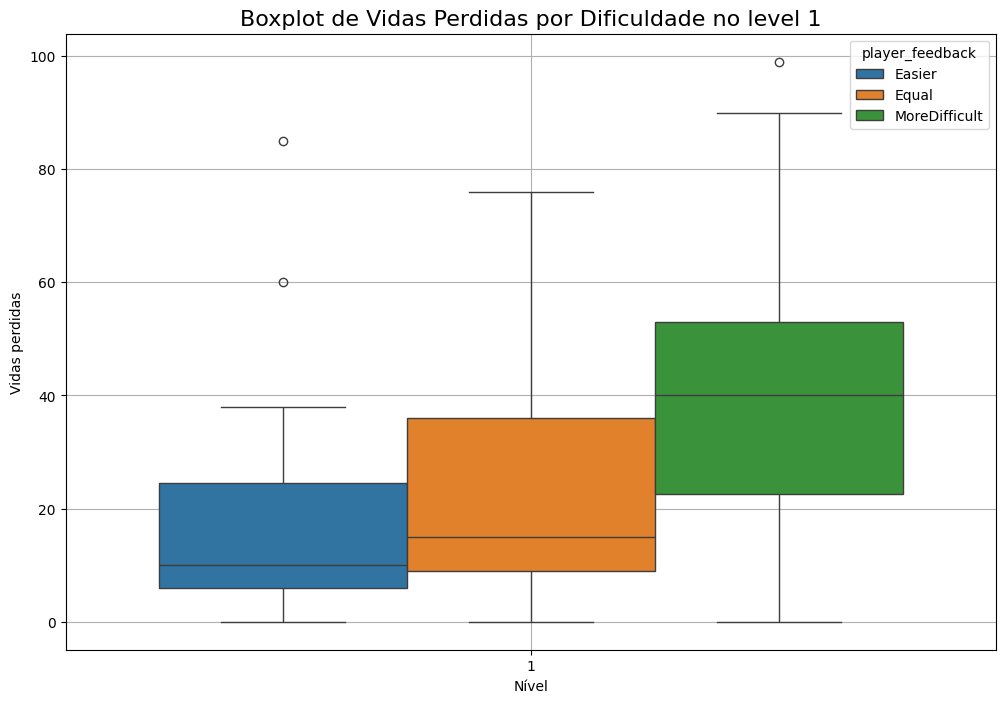

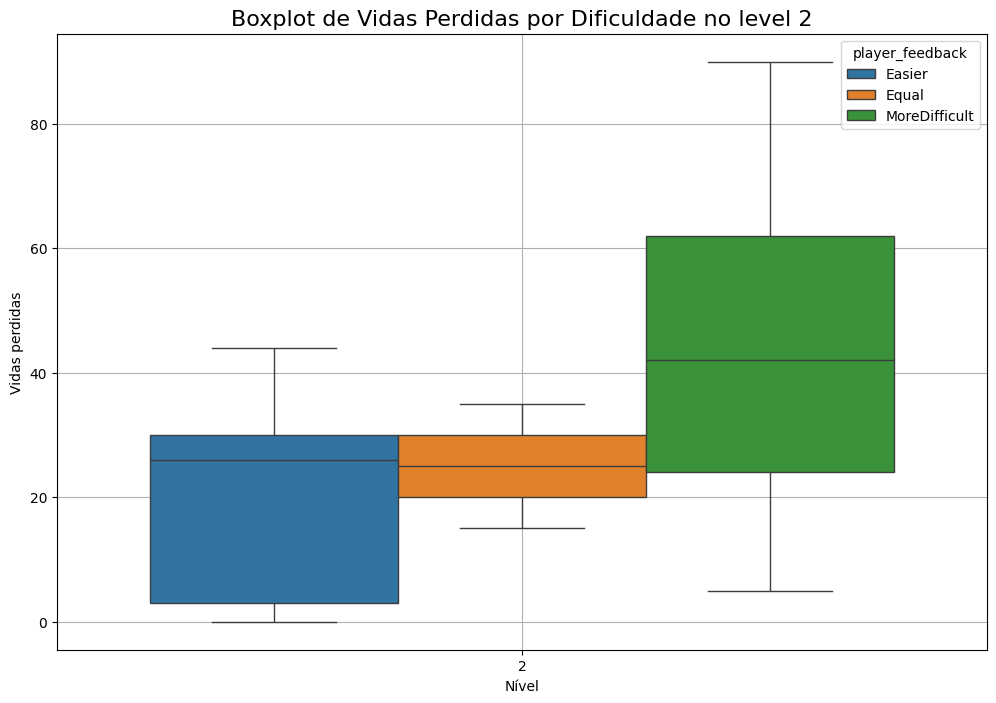

In [ ]:
def plot_lost_life_boxplot_by_feedback(df, level=None):
    filtered_runs = df[df['player_feedback'] != '']
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='level', y='lostLife', hue='player_feedback', data=filtered_runs, hue_order=feedback_order)
    plt.xlabel('Nível')
    plt.ylabel('Vidas perdidas')
    plt.grid()

    if level is not None:
        plt.title(f'Boxplot de Vidas Perdidas por Dificuldade no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/life_lost_feedback_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Vidas Perdidas por Dificuldade', fontsize=16)
        plt.savefig(f'{folder_path}/life_lost_feedback.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs, plot_lost_life_boxplot_by_feedback)

#### Todos os níveis em um plot só

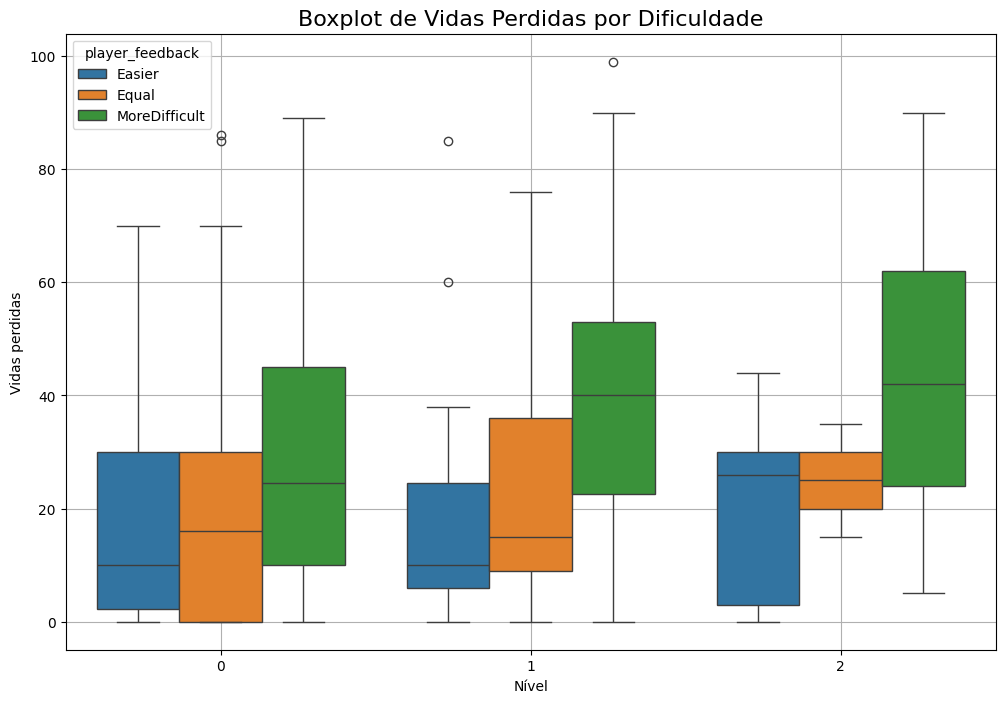

In [13]:
plot_lost_life_boxplot_by_feedback(runs)

## Tempo x feedback

Pergunta: "Jogadores tendem a passar mais tempo em níveis que acharam mais difíceis?"

### Boxplot

#### Plot por level

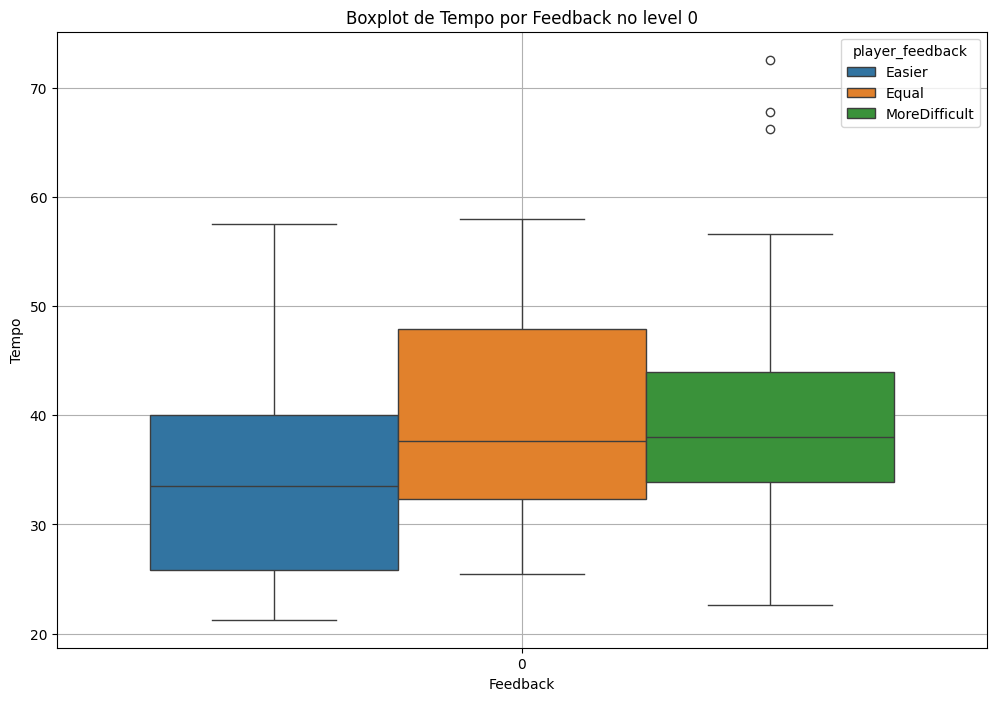

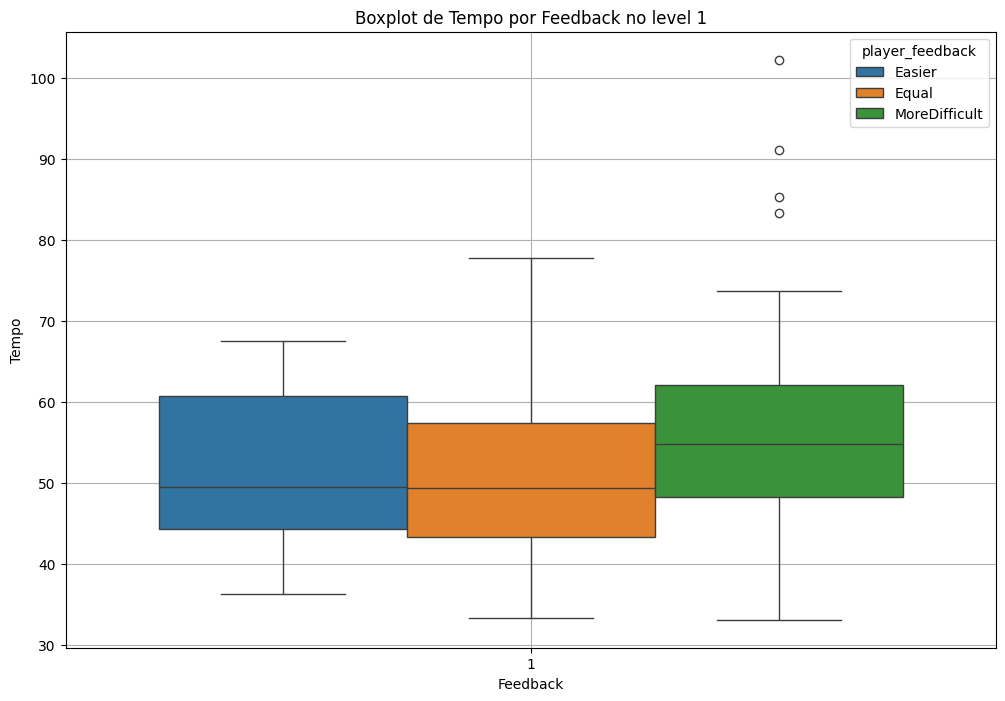

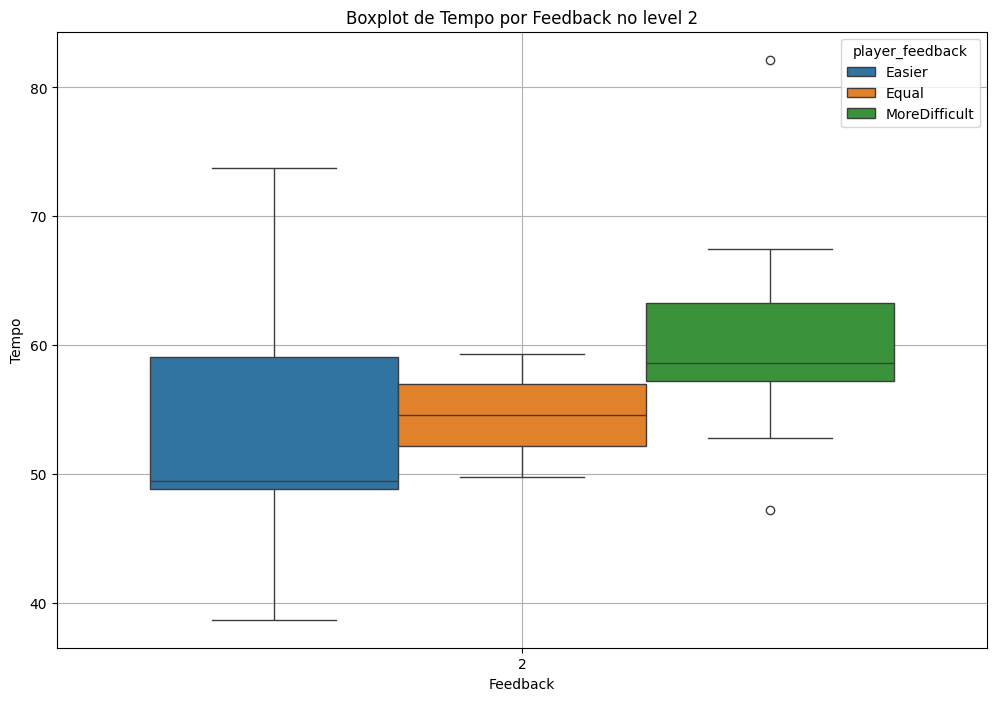

In [ ]:
def plot_time_boxplot_by_feedback(df, level=None):
    filtered_runs = df[df['player_feedback'] != '']

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='level', y='time', hue='player_feedback', data=filtered_runs, hue_order=feedback_order)
    plt.xlabel('Feedback')
    plt.ylabel('Tempo')
    plt.grid()

    if level is not None:
        plt.title(f'Boxplot de Tempo por Feedback no level {level}')
        plt.savefig(f'{folder_path}/time_feedback_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Tempo por Feedback')
        plt.savefig(f'{folder_path}/time_feedback.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(runs, plot_time_boxplot_by_feedback)

#### Todos os níveis em um plot só

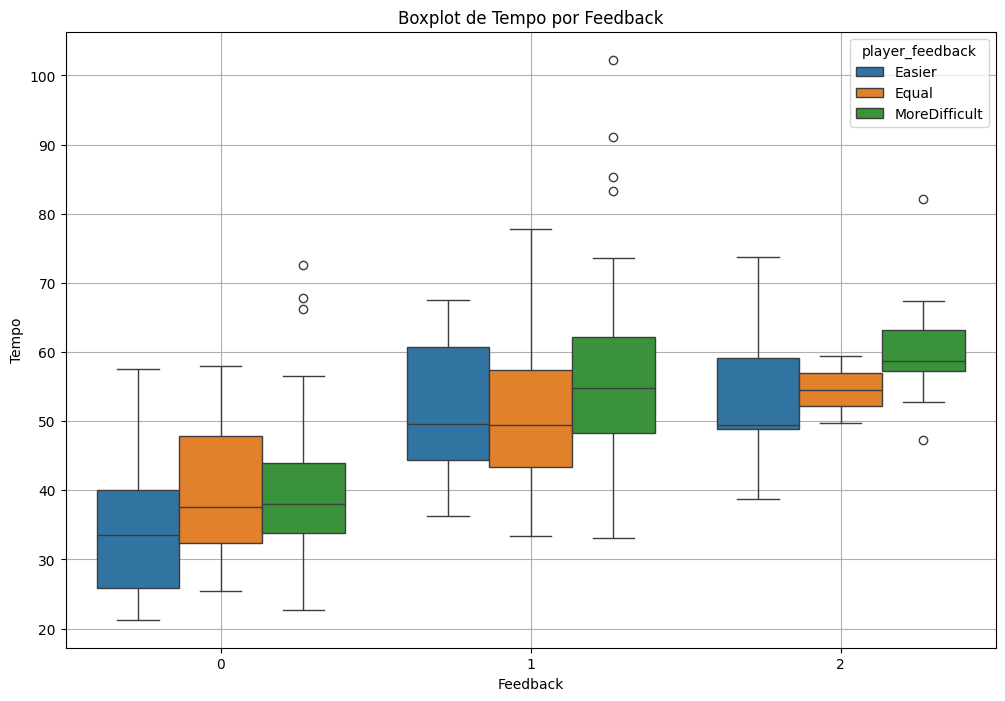

In [15]:
plot_time_boxplot_by_feedback(runs)

# Pergunta: "Qual a relação entre a dificuldade real e seu desempenho?"

## Média de mortes x Actual Difficulty

Pergunta: "Os jogadores morrem mais em níveis mais difíceis?

In [ ]:
data = []

for level in runs['level'].unique():
    df_level = runs[runs['level'] == level]
    deaths = df_level[df_level['is_completed'] == 0]
    
    for actual_difficulty in df_level['actual_difficulty'].unique():
        num_deaths = deaths[deaths['actual_difficulty'] == actual_difficulty].shape[0]
        total_attempts = df_level[df_level['actual_difficulty'] == actual_difficulty].shape[0]

        if total_attempts > 0:
            mean_deaths = num_deaths / total_attempts
            data.append({'level': level, 'actual_difficulty': actual_difficulty, 'mean_deaths': mean_deaths})

df_death = pd.DataFrame(data)

### Barplot

#### Um plot por nível

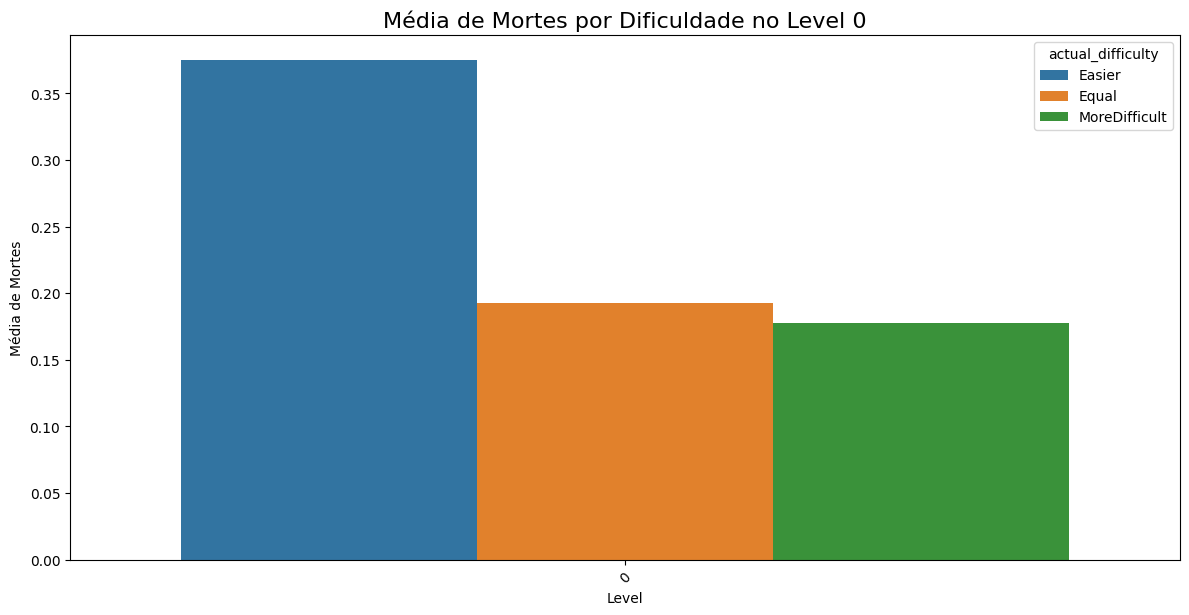

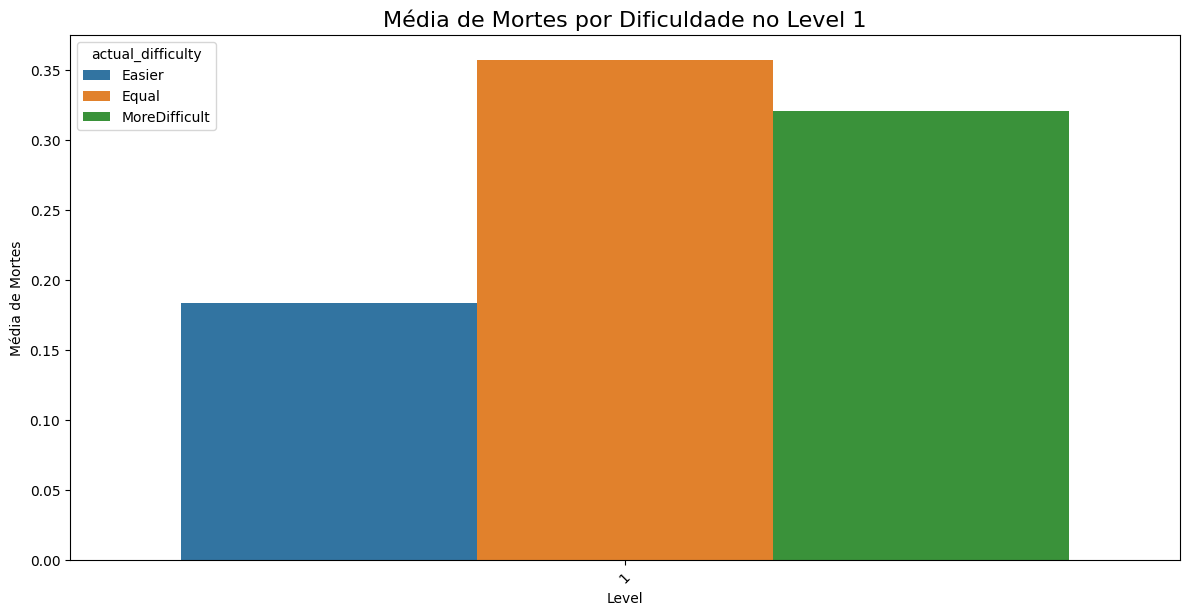

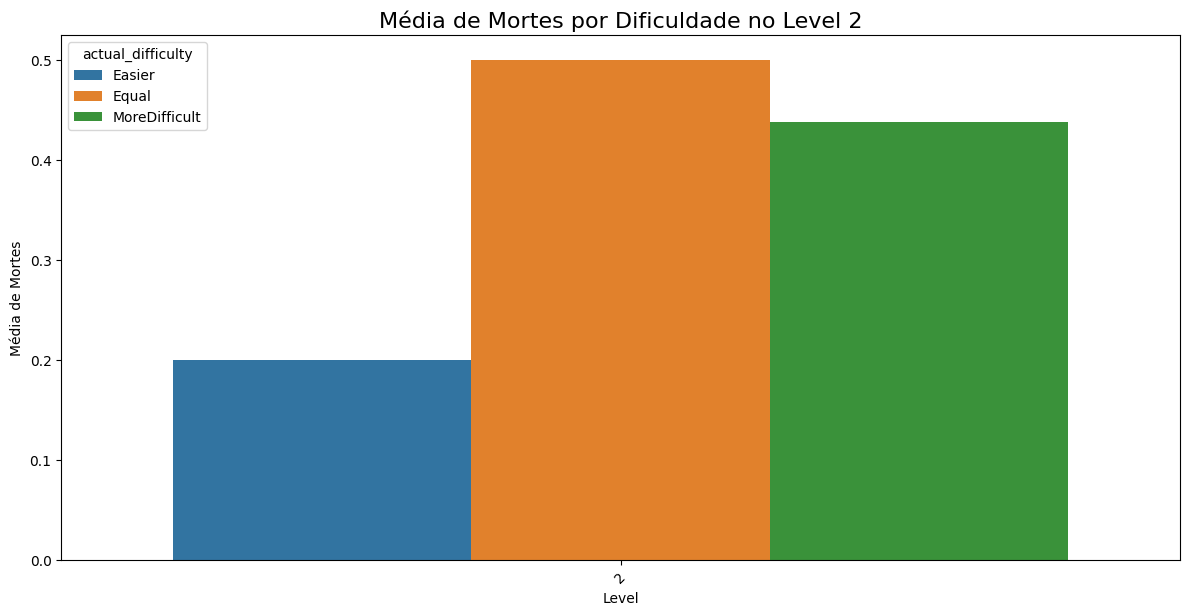

In [ ]:
def plot_death_mean_barplot(df, level=None):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='level', y='mean_deaths', hue='actual_difficulty', hue_order=feedback_order, data=df)
    plt.xlabel('Level')
    plt.ylabel('Média de Mortes')
    plt.xticks(rotation=45)
    plt.tight_layout()

    if level is not None:
        plt.title(f'Média de Mortes por Dificuldade no Level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/death_mean_real_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Média de Mortes por Dificuldade', fontsize=16)
        plt.savefig(f'{folder_path}/death_mean_real_difficulty.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(df_death, plot_death_mean_barplot)

#### Todos os níveis de uma vez só

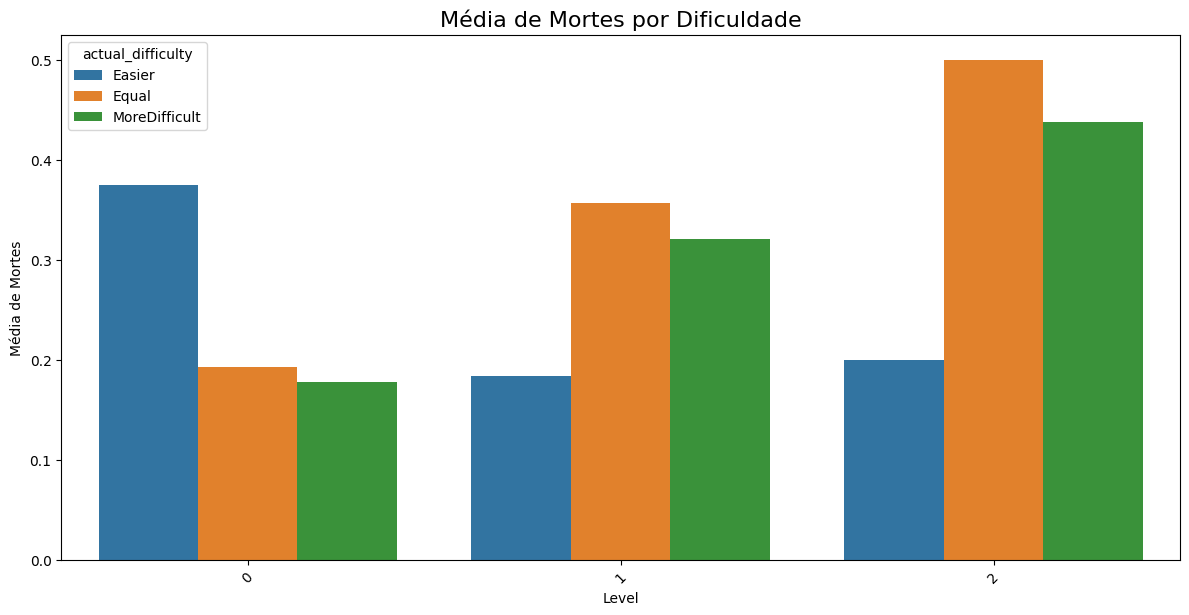

In [18]:
plot_death_mean_barplot(df_death)

## Vida perdida x Actual Difficulty

Pergunta: "Os jogadores perdem mais vidas em níveis mais difíceis?"

### Boxplot

#### Plot por level

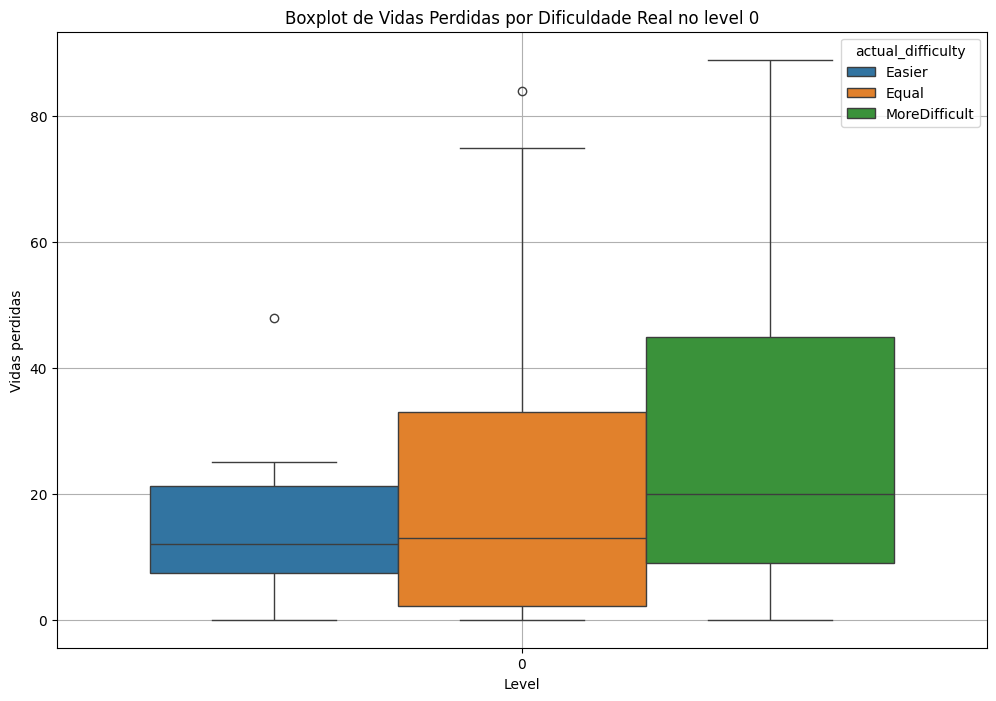

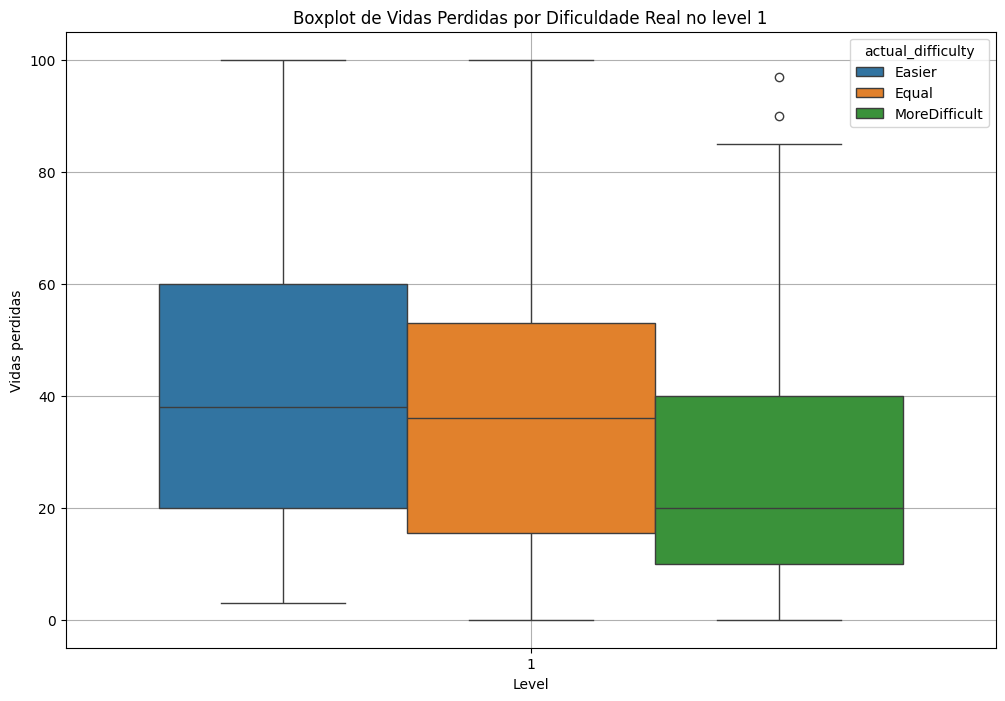

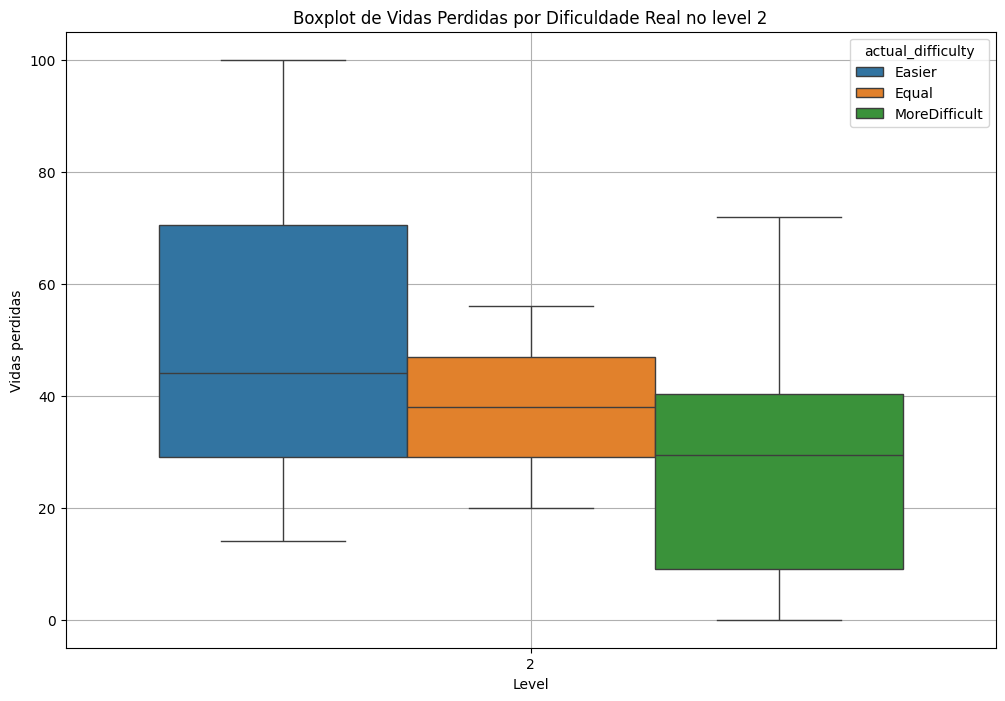

In [ ]:
def plot_lost_life_boxplot_by_feedback(df, level=None):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='level', y='lostLife', hue='actual_difficulty', data=df, hue_order=feedback_order)
    plt.xlabel('Level')
    plt.ylabel('Vidas perdidas')
    plt.grid()

    if level is not None:
        plt.title(f'Boxplot de Vidas Perdidas por Dificuldade Real no level {level}')
        plt.savefig(f'{folder_path}/life_lost_real_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Vidas Perdidas por Dificuldade Real')
        plt.savefig(f'{folder_path}/life_lost_real_difficulty_level.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(runs, plot_lost_life_boxplot_by_feedback)

#### Todos os níveis em um plot só

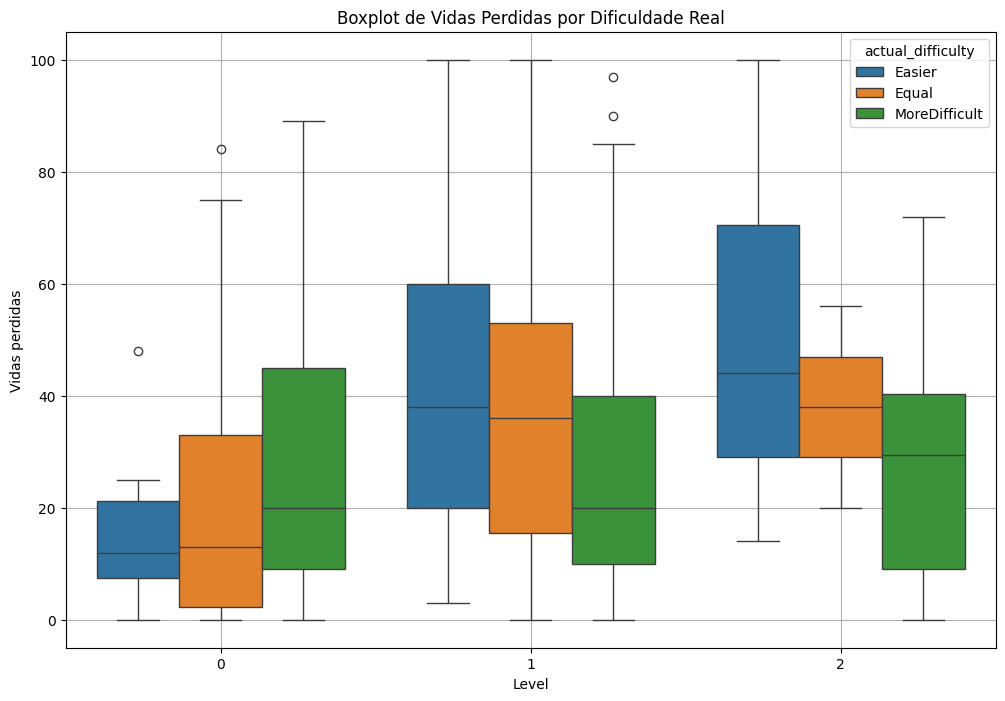

In [20]:
plot_lost_life_boxplot_by_feedback(runs)

## Tempo x Actual Difficulty

Pergunta: "Jogadores tendem a passar mais tempo em níveis mais difíceis?"

### Boxplot

#### Plot por level

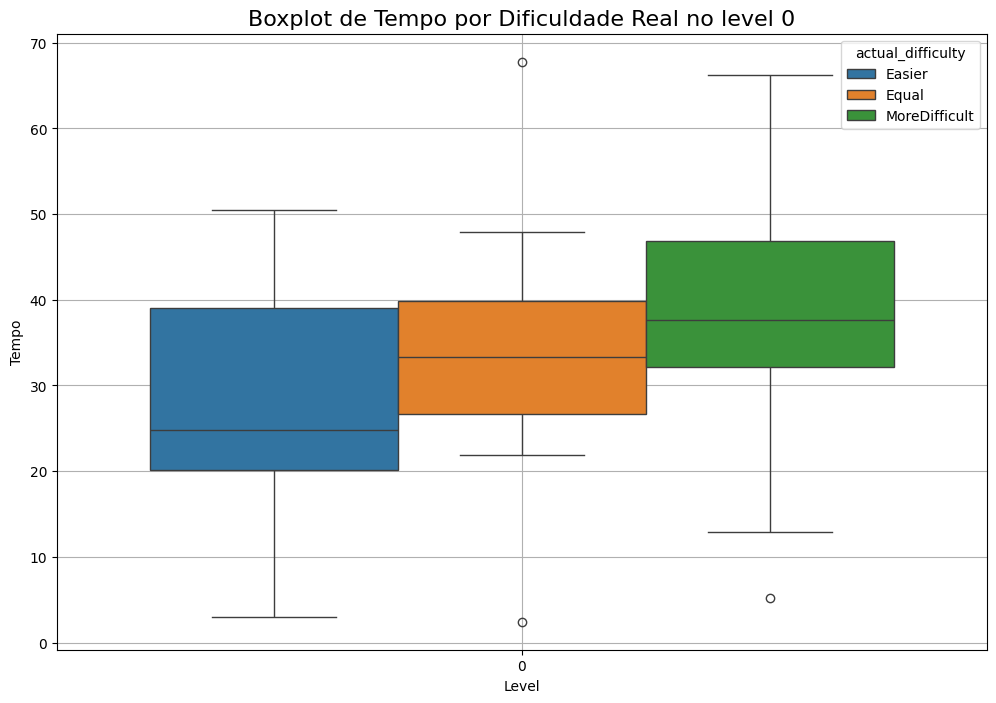

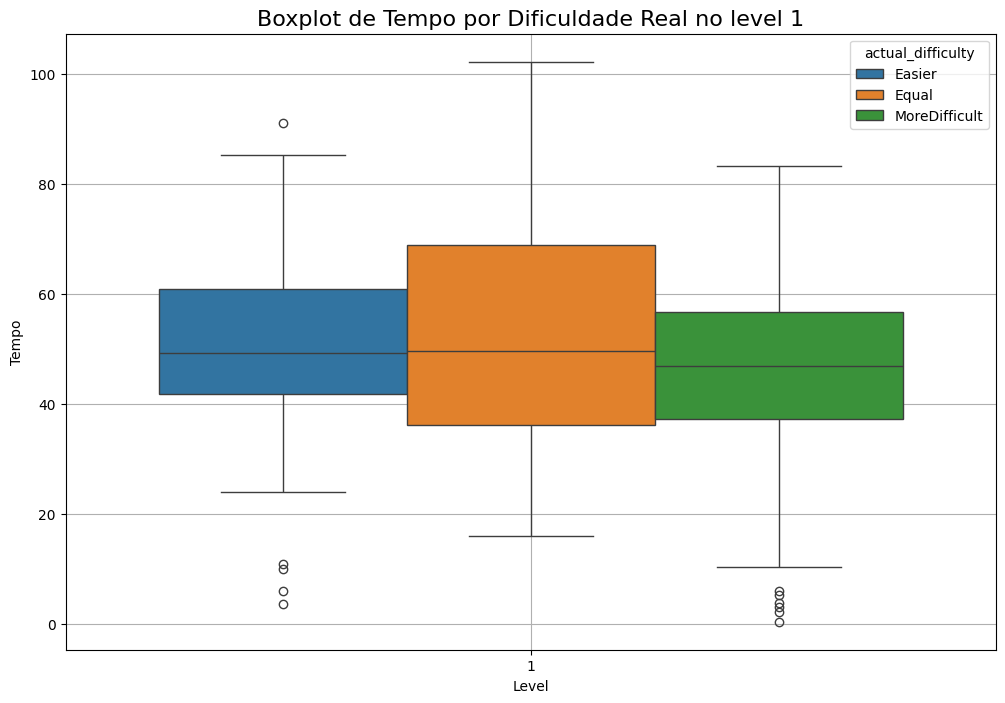

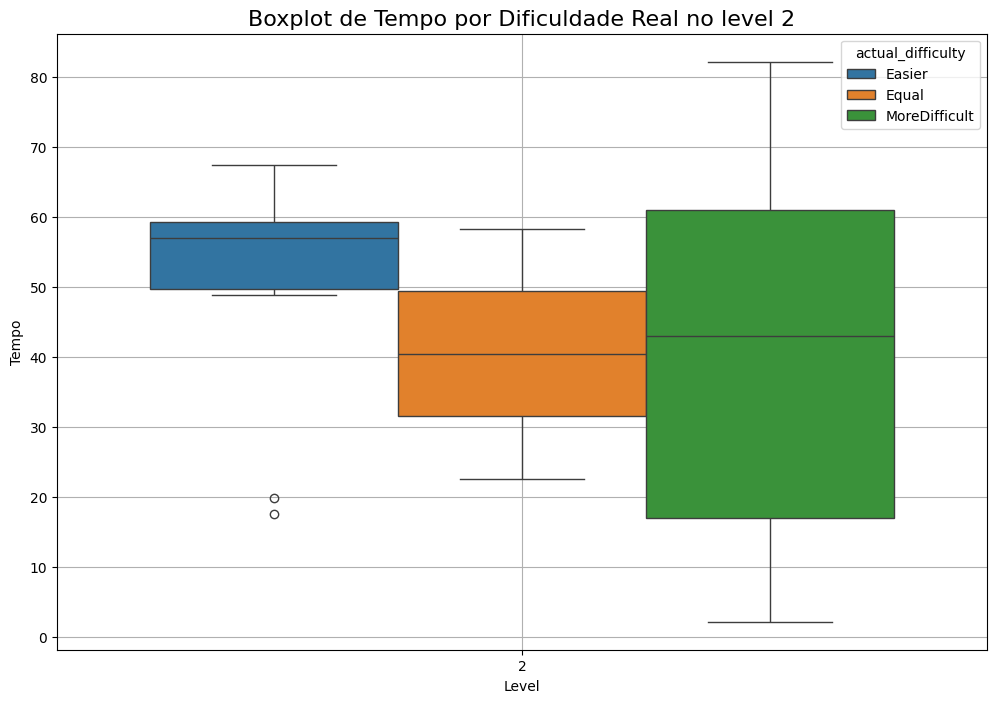

In [ ]:
def plot_time_boxplot_by_feedback(df, level=None):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='level', y='time', hue='actual_difficulty', data=df, hue_order=feedback_order)
    plt.xlabel('Level')
    plt.ylabel('Tempo')
    plt.grid()
    
    if level is not None:
        plt.title(f'Boxplot de Tempo por Dificuldade Real no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/time_real_difficulty_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Boxplot de Tempo por Dificuldade Real', fontsize=16)
        plt.savefig(f'{folder_path}/time_real_difficulty.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(runs, plot_time_boxplot_by_feedback)

#### Todos os níveis em um plot só

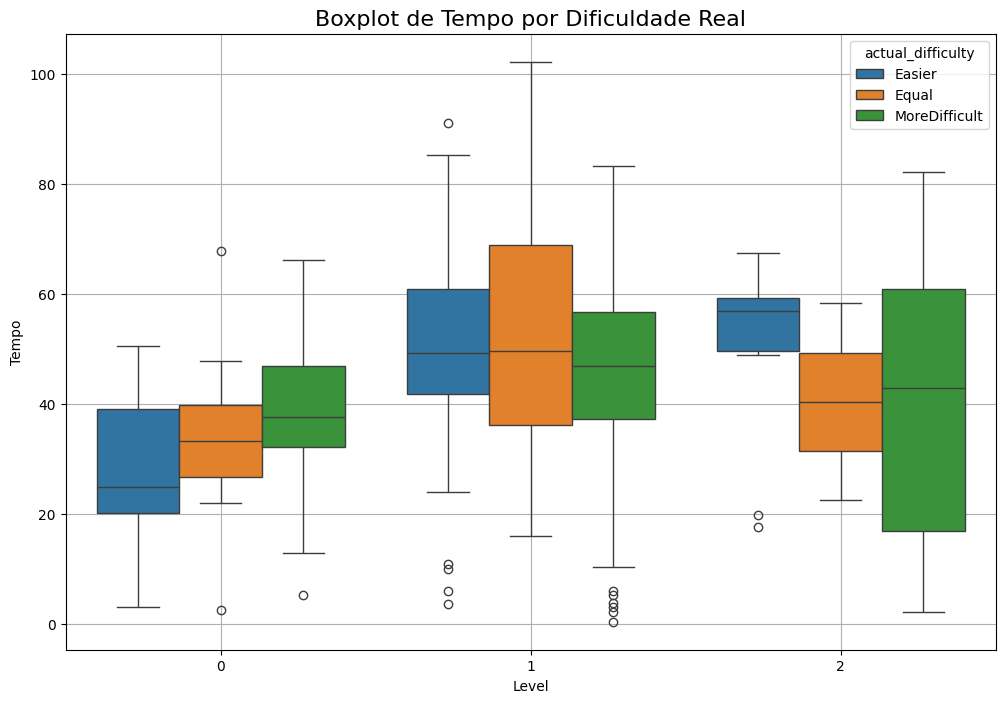

In [22]:
plot_time_boxplot_by_feedback(runs)

# Relações entre as variáveis

## Tempo x Vida Perdida

Pergunta: "Jogadores que gastam mais tempo em um nível tendem a perder mais vidas?"

### Plot por nível

<Figure size 1000x600 with 0 Axes>

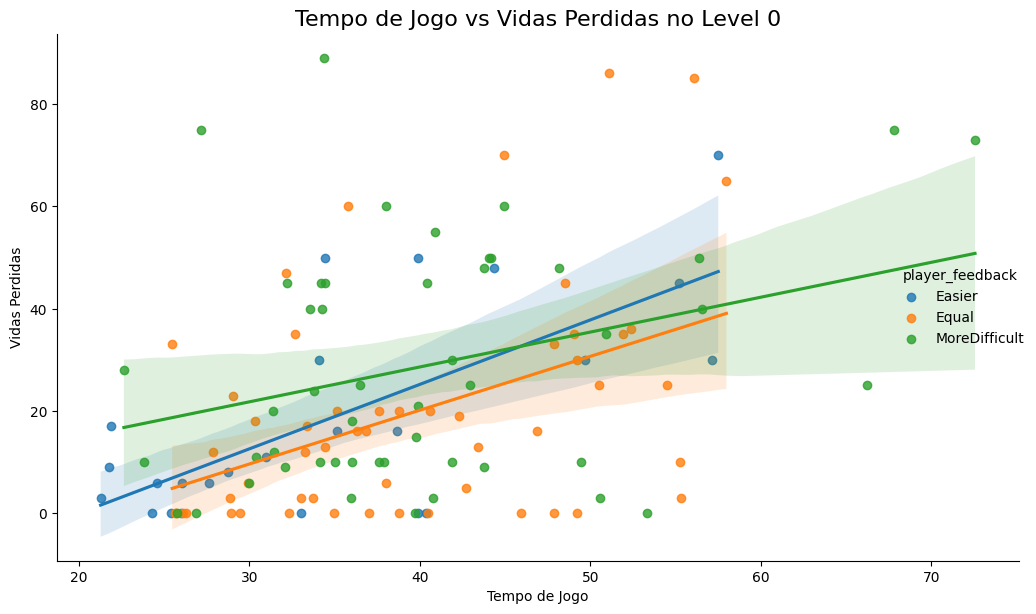

<Figure size 1000x600 with 0 Axes>

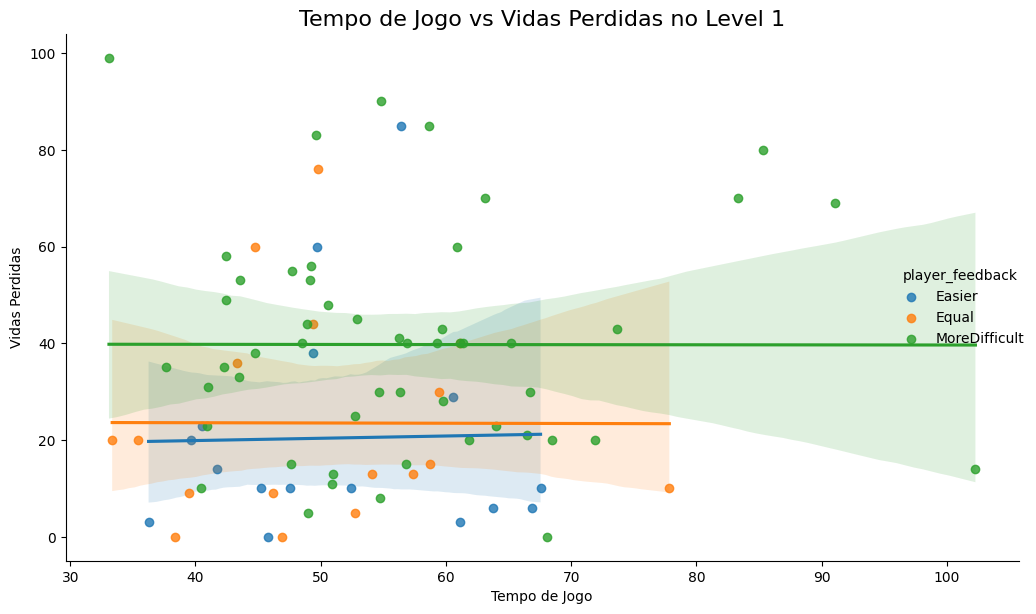

<Figure size 1000x600 with 0 Axes>

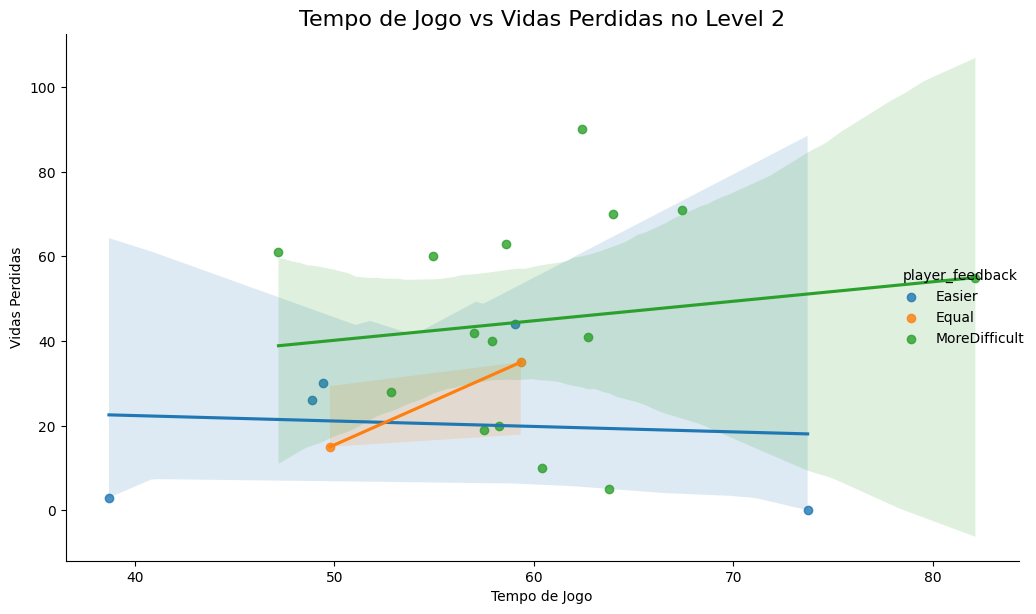

In [ ]:
def plot_time_lost_life_scatter(df, level=None):
    filtered_df = df[df['player_feedback'] != '']
    
    plt.figure(figsize=(10, 6))
    sns.lmplot(data=filtered_df, 
		x='time',
		y='lostLife',
		hue='player_feedback',
		hue_order=feedback_order,
		aspect=1.5,
		height=6)
    
    plt.xlabel('Tempo de Jogo')
    plt.ylabel('Vidas Perdidas')
    plt.tight_layout()

    if level is not None:
        plt.title(f'Tempo de Jogo vs Vidas Perdidas no Level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/lost_life_time_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Tempo de Jogo vs Vidas Perdidas', fontsize=16)
        plt.savefig(f'{folder_path}/lost_life_time.png', dpi=96, bbox_inches='tight')
    
    plt.show()

plot_for_each_level(runs, plot_time_lost_life_scatter)

### Todos os níveis em um plot

<Figure size 1000x600 with 0 Axes>

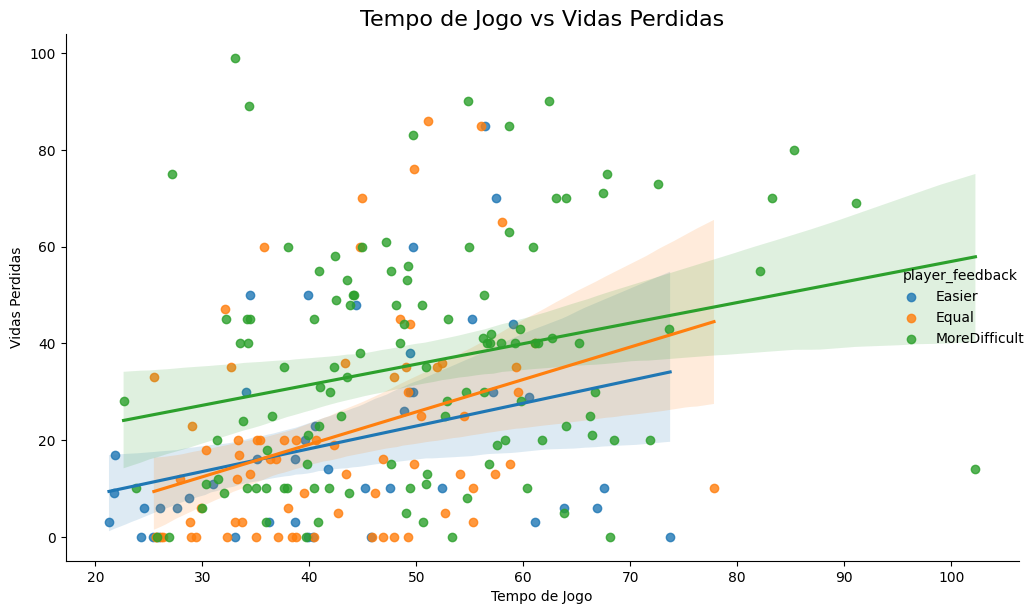

In [24]:
plot_time_lost_life_scatter(runs)

## Tempo x Vida perdida x Difficulty

Pergunta: "Tempo e vida perdida tem relação com a dificuldade do player?"

### Correlação

#### Um plot por nível

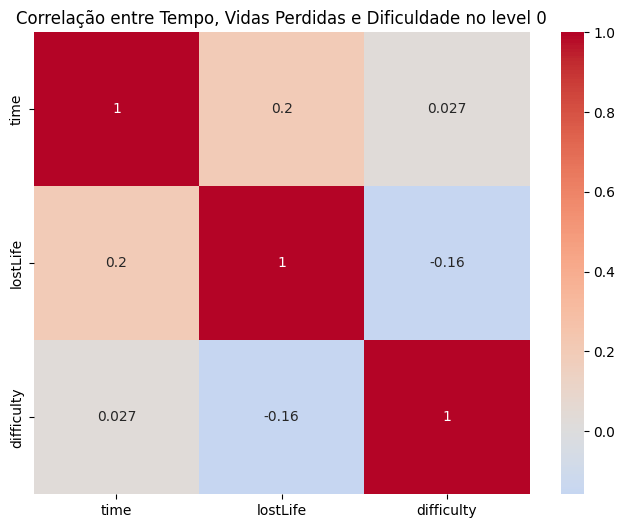

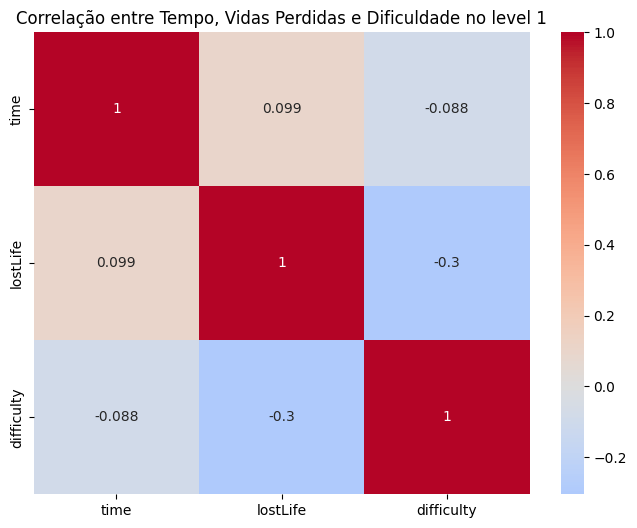

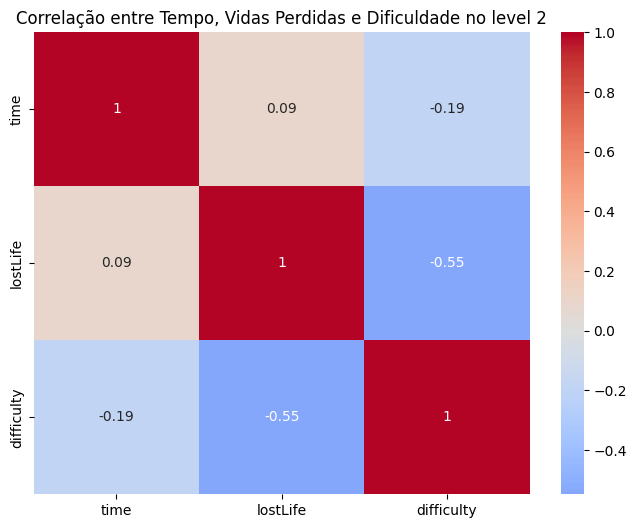

In [25]:
def plot_time_lost_life_feedback_corr(df, level=None):
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[['time', 'lostLife', 'difficulty']].corr()

    difficulty_correlation = correlation_matrix['difficulty']
    #print(f'level: {level}')
    #print(difficulty_correlation)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    if level is not None:
        plt.title(f'Correlação entre Tempo, Vidas Perdidas e Dificuldade no level {level}')
        plt.savefig(f'{folder_path}/time_lost_life_feedback_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Correlação entre Tempo, Vidas Perdidas e Dificuldade')
        plt.savefig(f'{folder_path}/time_lost_life_feedback_correlation.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs, plot_time_lost_life_feedback_corr)

#### Tudo em um plot só

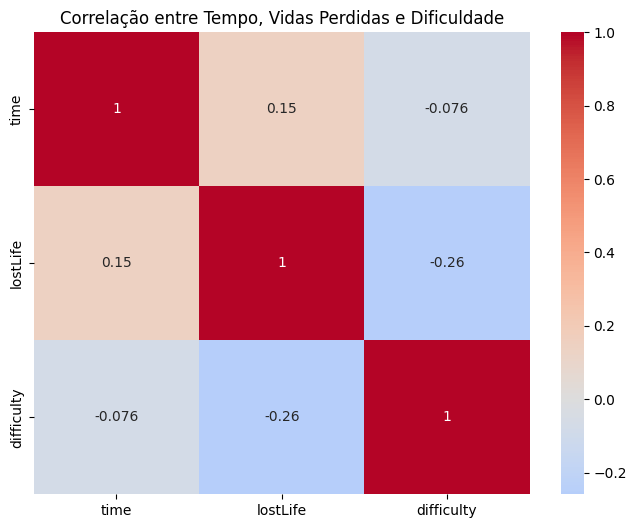

In [26]:
plot_time_lost_life_feedback_corr(runs)

## Tempo x Vida perdida x Feedback

Pergunta: "Tempo e vida perdida tem relação com o feedback do player?"

### Correlação

#### Um plot por nível

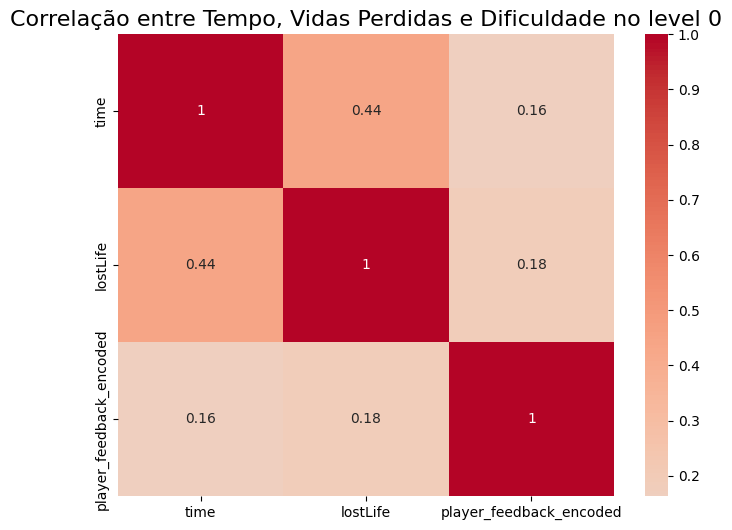

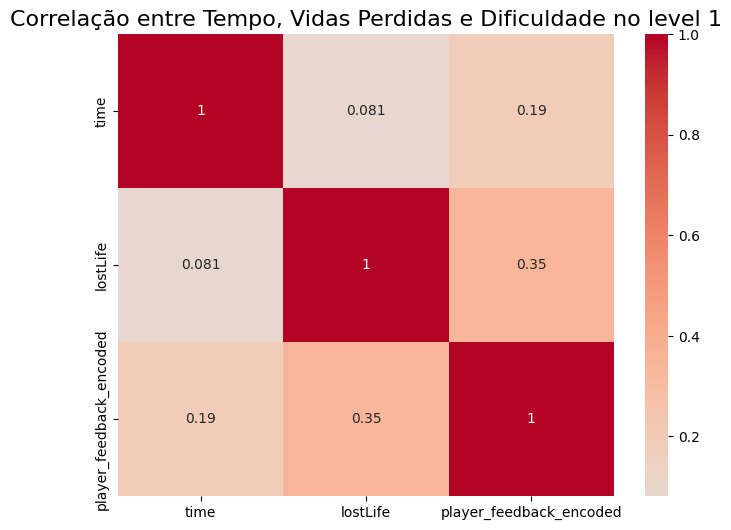

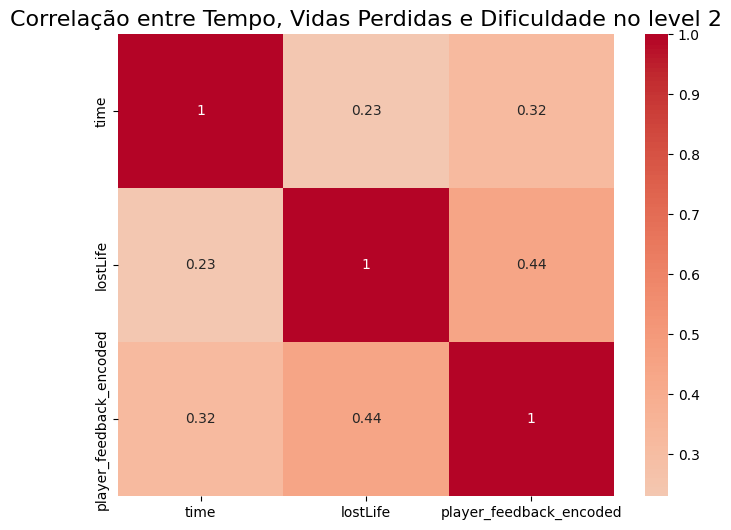

In [ ]:
def plot_time_lost_life_feedback_corr(df, level=None):
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[['time', 'lostLife', 'player_feedback_encoded']].corr()

    difficulty_correlation = correlation_matrix['player_feedback_encoded']
    #print(difficulty_correlation)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

    if level is not None:
        plt.title(f'Correlação entre Tempo, Vidas Perdidas e Dificuldade no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/time_lost_life_feedback_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Correlação entre Tempo, Vidas Perdidas e Dificuldade', fontsize=16)
        plt.savefig(f'{folder_path}/time_lost_life_feedback_correlation.png', dpi=96, bbox_inches='tight')

    plt.show()

filtered_runs = runs[runs['player_feedback'] != '']
filtered_runs['player_feedback_encoded'] = filtered_runs['player_feedback'].map(feedback_mapping)
plot_for_each_level(filtered_runs, plot_time_lost_life_feedback_corr)

#### Tudo em um plot só

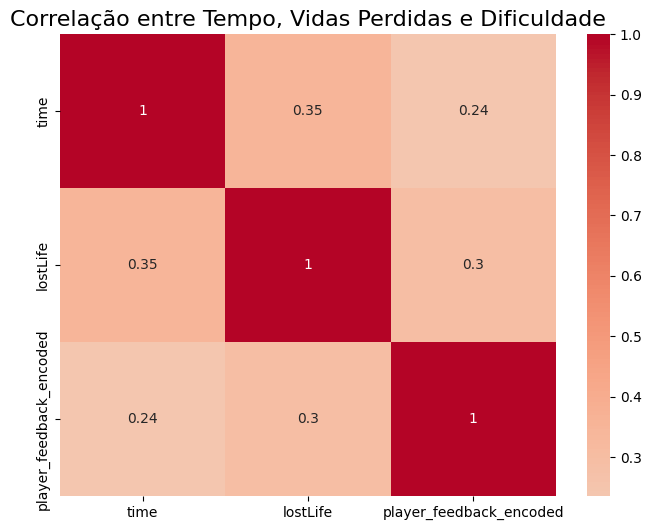

In [29]:
plot_time_lost_life_feedback_corr(filtered_runs)

## Tempo x Vida perdida x Actual Difficulty

Pergunta: "Tempo e vida perdida tem relação com a dificuldade?"

### Correlação

#### Um plot por nível

time                         0.204647
lostLife                     0.107697
actual_difficulty_encoded    1.000000
Name: actual_difficulty_encoded, dtype: float64


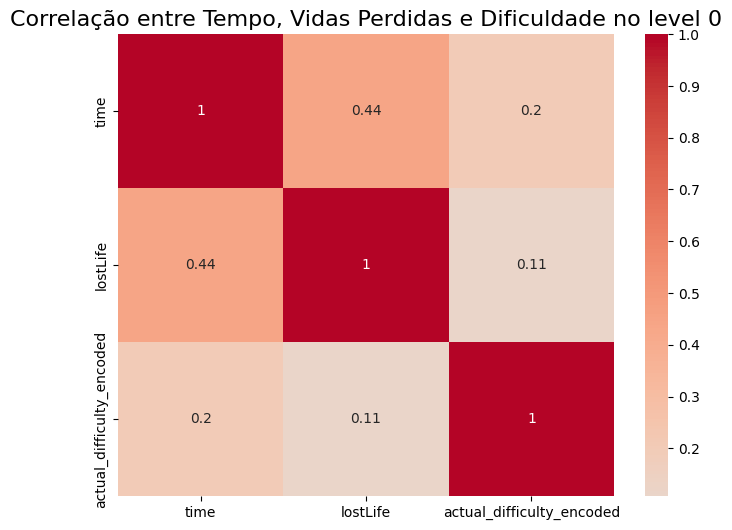

time                        -0.000019
lostLife                    -0.332722
actual_difficulty_encoded    1.000000
Name: actual_difficulty_encoded, dtype: float64


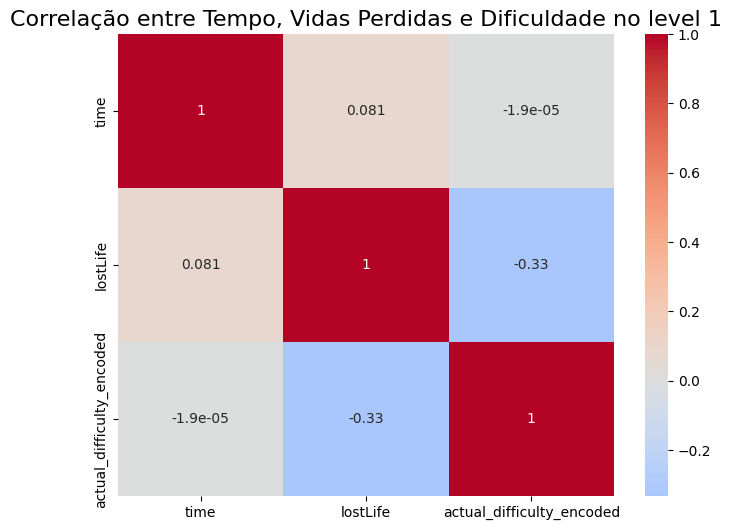

time                         0.186155
lostLife                    -0.440980
actual_difficulty_encoded    1.000000
Name: actual_difficulty_encoded, dtype: float64


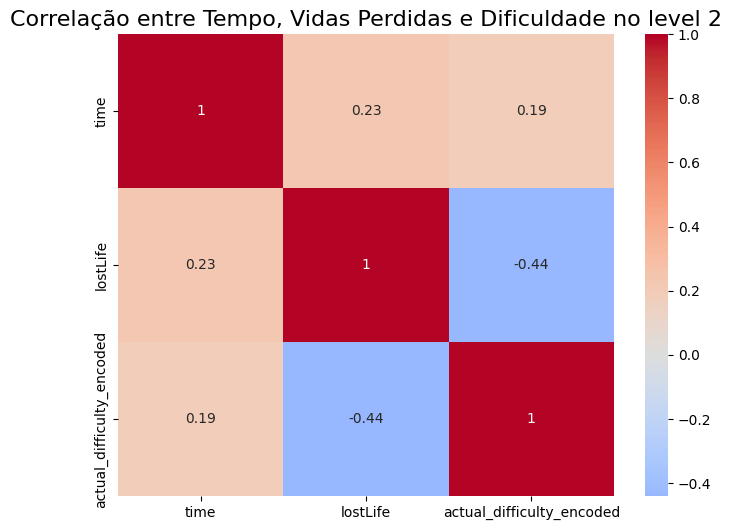

In [ ]:
def plot_time_lost_life_actual_difficulty_corr(df, level=None):
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[['time', 'lostLife', 'actual_difficulty_encoded']].corr()

    difficulty_correlation = correlation_matrix['actual_difficulty_encoded']
    #print(difficulty_correlation)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    if level is not None:
        plt.title(f'Correlação entre Tempo, Vidas Perdidas e Dificuldade no level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/time_lost_life_actual_dfficulty_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Correlação entre Tempo, Vidas Perdidas e Dificuldade', fontsize=16)
        plt.savefig(f'{folder_path}/time_lost_life_actual_dfficulty_correlation.png', dpi=96, bbox_inches='tight')
    plt.show()

filtered_runs = runs[runs['player_feedback'] != '']
filtered_runs['actual_difficulty_encoded'] = filtered_runs['actual_difficulty'].map(feedback_mapping)
plot_for_each_level(filtered_runs, plot_time_lost_life_actual_difficulty_corr)

#### Tudo em um plot só

time                        -0.122909
lostLife                    -0.308146
actual_difficulty_encoded    1.000000
Name: actual_difficulty_encoded, dtype: float64


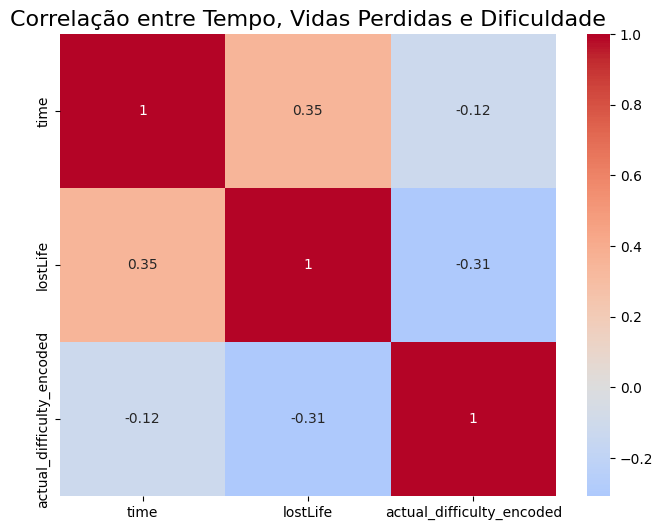

In [32]:
plot_time_lost_life_actual_difficulty_corr(filtered_runs)